<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-исходными-данными" data-toc-modified-id="Знакомство-с-исходными-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с исходными данными</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-характеристик-объявлений" data-toc-modified-id="Изучение-характеристик-объявлений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение характеристик объявлений</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></div>


<a id="1"></a>
## Знакомство с исходными данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

initial_data = pd.read_csv('real_estate_data.csv', sep=',', decimal = '.')
initial_data.columns   #Проверяем названия столбцов, находим неудачное cityCenters_nearest
initial_data = initial_data.rename(columns = {'cityCenters_nearest':'city_center_distance'}) #Изменяем на более понятное
initial_data.columns
del initial_data['Unnamed: 0']
print()
initial_data.info() # Всего 23699 объявлений.
print()
print(initial_data.head(15))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

### Вывод

База данных содержит информацию о 23699 объявлениях о продаже квартир. Для каждого объекта есть информация о 22 параметрах (без учета пропущенных значений). Название одного из столбцов с названием cityCenter_nearest мы сразу сменили как нетипичное и не отражающее смысл характеристики. Следующие столбцы имеют неудачный формат и на последующих этапах работы будут изменены:
- first_day_exposition: удобнее будет работать с форматом datetime
- floors_total: изменим на int
- is_apartment: логично изменить на bool
- balcony: изменим на int
- locality_name: приставка поселок/городской поселок у ряда населенных пунктов может быть лишней и затруднить работу. С другой стороны, содержит потенциально полезную информацию, позже решим что с этим делать.
- parks_around3000, ponds_around_3000: меняем на int
- days_exposition: изменим на int

<a id="2"></a>
## Предобработка данных

На данном шаге проведем детальный анализ имеющихся параметров в датасете: последовательно пройдемся по предоставленным характеристикам квартир, изучим диапазоны их значений, пропущенные значения, постараемся выявить причины их появления

<a id="21"></a>
### Изучение характеристик объявлений

Последовательно пройдемся по характеристикам, изучим диапазоны их значений, пропущенные, причин появления

In [2]:
initial_data.info()
print()

print('Общий процент пропусков по характеристикам')
print(initial_data.isnull().sum()*100/len(initial_data))
print()

# Проверка дуликатов
print('Проверка дубликатов, итого')
print(initial_data.duplicated().sum())
print()

#Рассмотрение факторов
#Кол-во фото
print('Уникальные значения количества фото в объявлении')
print(initial_data['total_images'].unique())
print()

# Цена
print('Цены квартиры, мин, макс, медиана')
print(initial_data['last_price'].min())
print(initial_data['last_price'].max())
print(initial_data['last_price'].median())
print()

# Площадь
print('Площадь квартиры, мин, макс, медиана')
print(initial_data['total_area'].min())
print(initial_data['total_area'].max())
print(initial_data['total_area'].median())
print()

# Дата размещения
print('Дата размещения объявления')
print(initial_data['first_day_exposition'].head(10))
print()
print(initial_data['first_day_exposition'].tail(10))
print()

# Количество комнат
print('Количество комнат, мин, макс, среднее')
print(initial_data['rooms'].min())
print(initial_data['rooms'].max())
print(initial_data['rooms'].mean())
print('уникальные значения кол-ва комнат')
print(initial_data['rooms'].unique())
print()

# Просмотр количества квартир с 0 комнат
print('вывод объявлений с количеством комнат, равным 0')
print(initial_data[(initial_data['rooms'] == 0)].head(20))
print()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

высота потолков, мин, макс
1.0
100.0

уникальные значения характеристки высота потолков
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33  

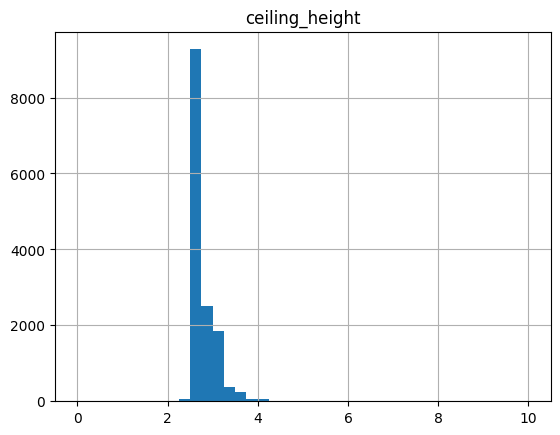

Уникальные значения в столбце этажность дома

медианное значение количества этажей в доме
9.0

Просмотр объявлений с пропущенными значениями этажности дома
      total_images  last_price  total_area first_day_exposition  rooms  \
186             12  11640000.0       65.20  2018-10-02T00:00:00      2   
237              4   2438033.0       28.10  2016-11-23T00:00:00      1   
457              4   9788348.0       70.80  2015-08-01T00:00:00      2   
671              4   6051191.0       93.60  2017-04-06T00:00:00      3   
1757             5   3600000.0       39.00  2017-04-22T00:00:00      1   
1930             1   9750000.0       66.77  2016-05-13T00:00:00      2   
2392             7   5395770.0       53.00  2017-06-29T00:00:00      2   
2846             4   2325000.0       27.80  2016-09-21T00:00:00      1   
2952            10   6500000.0       54.30  2019-04-23T00:00:00      1   
3031             9   6400000.0       56.70  2018-03-27T00:00:00      2   
3438            10   4100000.0

In [3]:
#Высота потолков
print('высота потолков, мин, макс')
print(initial_data['ceiling_height'].min())
print(initial_data['ceiling_height'].max())
print()
print('уникальные значения характеристки высота потолков')
print(initial_data['ceiling_height'].unique())

initial_data.hist(column = 'ceiling_height', bins = 40, range = (0,10))
plt.show()

# Этажность дома
print('Уникальные значения в столбце этажность дома')
initial_data['floors_total'].unique()
print()
print('медианное значение количества этажей в доме')
print(initial_data['floors_total'].median())
print()
print('Просмотр объявлений с пропущенными значениями этажности дома')
print(initial_data[initial_data['floors_total'].isna() == True].head(20))



жилая площадь, общие показатели
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
Проверка: вывод объявлений с жилой площадью, превышающей общую
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_center_distance, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []



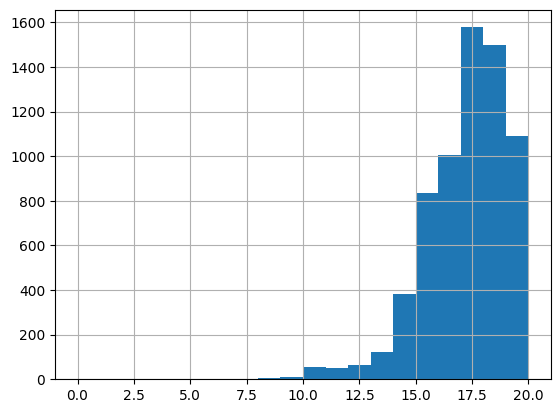

Объявления с жилой площадью менее 8 метров
       total_images  last_price  total_area first_day_exposition  rooms  \
3242              7   4440000.0        41.0  2017-07-02T00:00:00      1   
13915            20   6350000.0        52.0  2018-02-06T00:00:00      2   
16431            13   3799000.0        31.0  2018-04-12T00:00:00      1   
17582            11   2680000.0        22.0  2018-08-11T00:00:00      0   
19251            19   4050000.0        33.0  2018-10-15T00:00:00      1   
21758             0   2330000.0        23.0  2018-01-01T00:00:00      0   
21943            15   6100000.0        77.6  2019-02-28T00:00:00      4   
23574            14  64990000.0       139.0  2015-11-24T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3242              NaN          17.0          3.0     17          NaN   False   
13915             3.0           6.0          2.0      2          NaN   False   
16431             2.6           5.0      

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [4]:
# Жилая площаь
print('жилая площадь, общие показатели')
print(initial_data['living_area'].describe())
plt.show()

# Проверка нелогичных значений
print('Проверка: вывод объявлений с жилой площадью, превышающей общую')
print(initial_data.query('living_area > total_area'))  #проверим, а нет ли в обяъвлениях очевидных опечаток
print()

# Рассмторение квартир с низкой жилой площадью
initial_data['living_area'].hist(bins=20, range = (0, 20))
plt.show()
print('Объявления с жилой площадью менее 8 метров')
print(initial_data.query('living_area < 8'))
print()

# Этаж объекта
print('Уникальные значения этажа объекта')
initial_data['floor'].unique()

Уникальные значения столбца апартаменты
[nan False True]
Количество объектов - апартаментов в базе данных: 50
Количество не апартаментов в базе данных: 2725

Количество студий: 149
Количество не студий: 23550

Количество объектов со свободной планировкой: 67
Количество объектов с установленной планировкой: 23632

Общее описание значений характеристики площадь кухни
count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Распределение характеристики площадь кухни


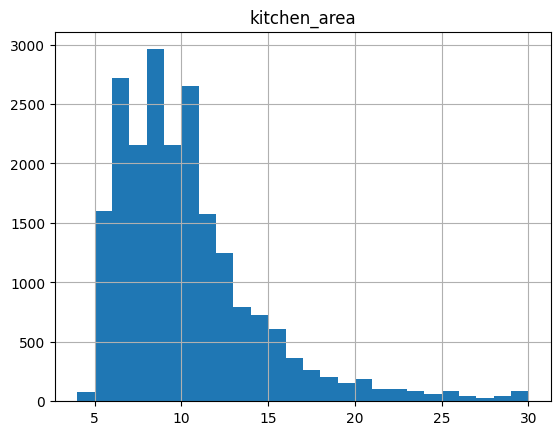

Распределение характеристкии площадь кухни в диапазоне до 8м2


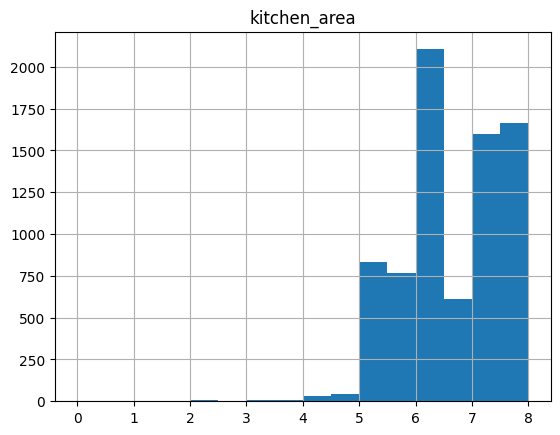

Сколько объектов с площадью кухни менее 4 м2
29

Просмотр таких объектов
       total_images  last_price  total_area first_day_exposition  rooms  \
906              15   2600000.0       27.00  2017-07-10T00:00:00      1   
2165             15   3180000.0       25.00  2019-03-21T00:00:00      1   
3078             17   6000000.0       43.00  2018-11-12T00:00:00      2   
3195             17   2690000.0       25.60  2018-02-19T00:00:00      1   
6084              6    770000.0       18.00  2017-10-16T00:00:00      1   
6262              9   3100000.0       24.00  2018-06-25T00:00:00      2   
7047              9   2800000.0       21.00  2017-09-23T00:00:00      1   
7950              3   5967734.0       66.40  2017-02-07T00:00:00      2   
8712              6  14948000.0       42.70  2017-09-15T00:00:00      2   
8729              9   2200000.0       18.40  2018-08-20T00:00:00      1   
9138             17   2920000.0       23.29  2018-12-12T00:00:00      1   
10058             9   33500

In [5]:
# Апартаменты
print('Уникальные значения столбца апартаменты')
print(initial_data['is_apartment'].unique())
print('Количество объектов - апартаментов в базе данных:', len(initial_data.query('is_apartment == True')))
print('Количество не апартаментов в базе данных:', len(initial_data.query('is_apartment == False')))
print()

# Студии
print('Количество студий:', len(initial_data.query('studio == True')))
print('Количество не студий:', len(initial_data.query('studio == False')))
print()

#Открытые планировки
print('Количество объектов со свободной планировкой:', len(initial_data.query('open_plan == True')))
print('Количество объектов с установленной планировкой:', len(initial_data.query('open_plan == False')))
print()

# Площадь кухни
print('Общее описание значений характеристики площадь кухни')
print(initial_data['kitchen_area'].describe())
print()
print('Распределение характеристики площадь кухни')
initial_data.hist(column = 'kitchen_area', bins = 26, range = (4, 30))
plt.show()

print('Распределение характеристкии площадь кухни в диапазоне до 8м2')
initial_data.hist(column = 'kitchen_area', bins = 16, range = (0, 8))  # проверка области малых значений
plt.show()
print('Сколько объектов с площадью кухни менее 4 м2')
print(len(initial_data.query('kitchen_area < 4'))) #сколько квартир с кухней < 4м2 - 29
print()
print('Просмотр таких объектов')
print(initial_data.query('kitchen_area < 4')) # большая часть - маленькие квартиры с невысокой стоимостью

In [6]:
#Количество балконов
print('Уникальные значения количества балконов')
print(initial_data['balcony'].unique())
balcony_data = initial_data.copy()   #создадим  новый датафрейм, где информацию о кол-ве балконов поменяем на 10
balcony_data['balcony'] = initial_data['balcony'].fillna(10)
print()

print(balcony_data.groupby('balcony').agg(                 # проверка типовых значений last_price, total_area, floor, rooms
    {'last_price': ['min', 'max', 'mean', 'median', 'count'], 
     'total_area': ['min', 'max', 'mean', 'median', 'count'], 
     'floor': ['min', 'max', 'mean', 'median', 'count'], 
     'rooms': ['min', 'max', 'mean', 'median', 'count']}
))
print()
# Замена NaN значений на 0
initial_data['balcony'] = initial_data['balcony'].fillna(0)    #меняем NaN на 0
print(initial_data['balcony'].unique())     #проверяем
print()
# Название населенного пункта
print('Уникальные названия населенного пункта')
print(len(initial_data['locality_name'].unique()))
print()
initial_data['locality_name'] = initial_data['locality_name'].astype('str')   #назначаем тип строки

# Исправление опечаток
for i in range(len(initial_data)):
    tmp = initial_data.loc[i, 'locality_name'] 
    initial_data.loc[i, 'locality_name'] = tmp.replace("посёлок", "поселок")   #првоодим замену для избавления от дубликатов

print('Проверка: количество уникальных значений после замены')
print(len(initial_data['locality_name'].unique()))       #проверка


Уникальные значения количества балконов
[nan  2.  0.  1.  5.  4.  3.]

        last_price                                              total_area  \
               min          max          mean     median  count        min   
balcony                                                                      
0.0       550000.0  240000000.0  6.613249e+06  4400000.0   3758       17.0   
1.0       450000.0  140000000.0  5.942251e+06  4395000.0   4195       18.0   
2.0       565000.0  763000000.0  6.065327e+06  4700000.0   3659       20.0   
3.0      2000000.0  401300000.0  1.364658e+07  6500000.0     81       30.1   
4.0      1650000.0   85000000.0  1.048883e+07  6999000.0    183       33.5   
5.0      1300000.0  130000000.0  8.845202e+06  6800000.0    304       25.0   
10.0       12190.0  420000000.0  6.714214e+06  4700000.0  11519       12.0   

                                        floor                              \
           max       mean median  count   min max      mean median  cou

Общее описание удаленности объекта от аэропорта
count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64



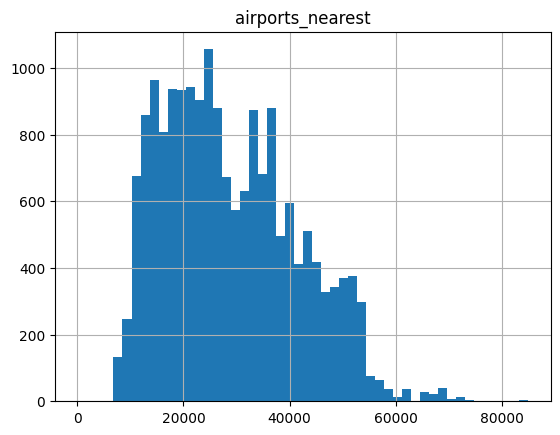

Общее описание значений "Расстояние до центра города"
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_center_distance, dtype: float64


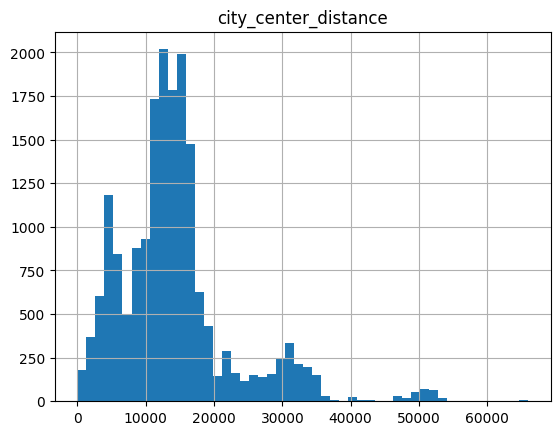

Проверка: до центра какого города считается расстояние
['Санкт-Петербург' 'nan']


In [7]:
#геолокационные параметры
print('Общее описание удаленности объекта от аэропорта')
print(initial_data['airports_nearest'].describe())
print()

initial_data.hist(column = 'airports_nearest', bins = 50, range = (0, 85000))
plt.show()

print('Общее описание значений "Расстояние до центра города"')
print(initial_data['city_center_distance'].describe())

initial_data.hist(column = 'city_center_distance', bins = 50, range =(0, 66000))
plt.show()

print('Проверка: до центра какого города считается расстояние')
print(initial_data.query('city_center_distance < 4000')['locality_name'].unique())


Общее описание характеристики кол-во парков в радиусе 3 км
count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


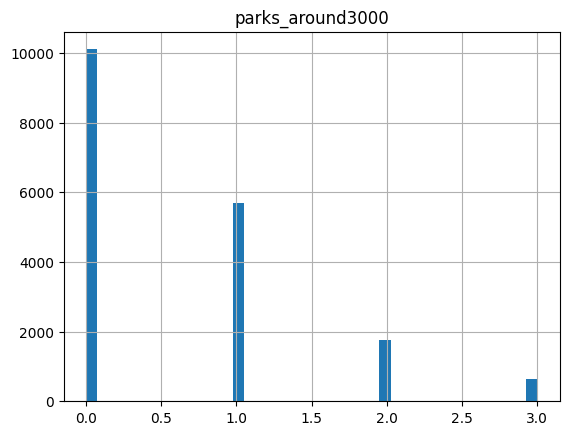

Сколько объектов с одним и более парком в 3км области
8075

Общее описание характеристики кол-во водоемов в радиусе 3 км
count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


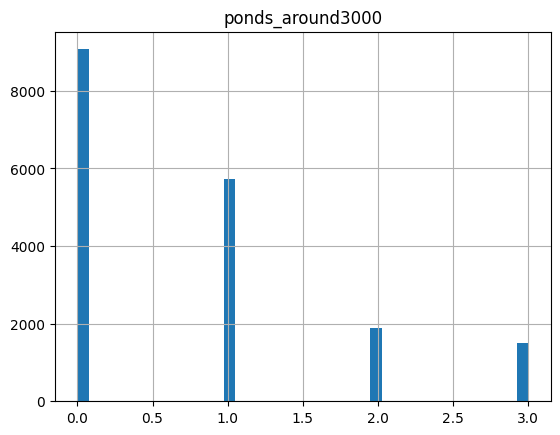

Сколько водоемов с одним и более парком в 3км области
9110


Общее описание характеристики удаления до ближайшего парка
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


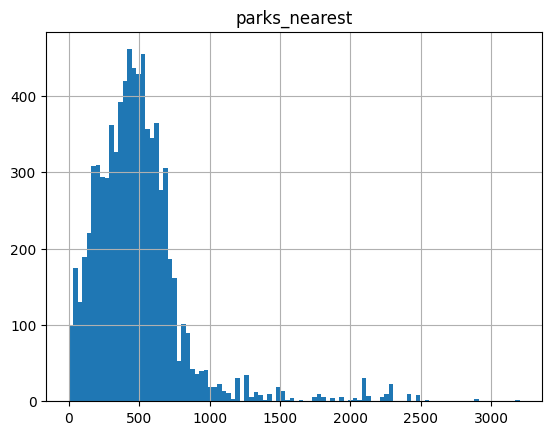


Общее описание характеристики удаления до ближайшего водоема
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


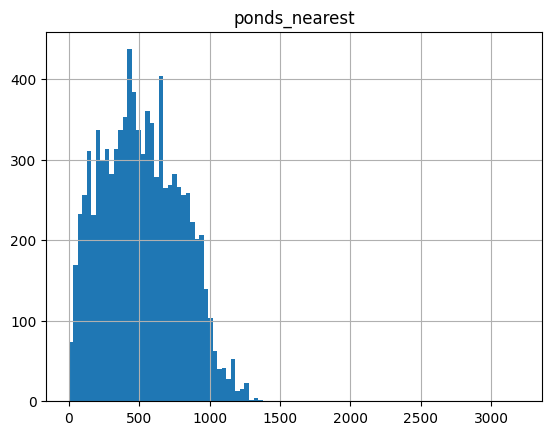

Проверка: сколько парков бывает в радиусе 3км если известно что расстояние до парка не пропущено
[2. 3. 1.]

Общее описание длительности публикации объявления
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


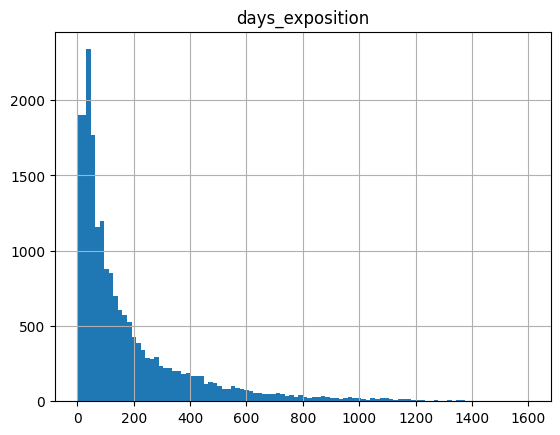

In [8]:
print('Общее описание характеристики кол-во парков в радиусе 3 км')
print(initial_data['parks_around3000'].describe())
initial_data.hist(column = 'parks_around3000', bins = 40, range = (0,3))
plt.show()
print('Сколько объектов с одним и более парком в 3км области')
print(len(initial_data.query('parks_around3000 > 0')))

print()
print('Общее описание характеристики кол-во водоемов в радиусе 3 км')
print(initial_data['ponds_around3000'].describe())
initial_data.hist(column = 'ponds_around3000', bins = 40, range = (0,3))
plt.show()
print('Сколько водоемов с одним и более парком в 3км области')
print(len(initial_data.query('ponds_around3000 > 0')))
print()

print()
print('Общее описание характеристики удаления до ближайшего парка')
print(initial_data['parks_nearest'].describe())
initial_data.hist(column = 'parks_nearest', bins = 100, range = (0,3200))
plt.show()

print()
print('Общее описание характеристики удаления до ближайшего водоема')
print(initial_data['ponds_nearest'].describe())
initial_data.hist(column = 'ponds_nearest', bins = 100, range = (0,3200))
plt.show()

#проверка нет ли NaN в ponds_around3000 если есть значение в ponds_nearest: все ок
print('Проверка: сколько парков бывает в радиусе 3км если известно что расстояние до парка не пропущено')
print(initial_data['ponds_around3000'].loc[initial_data['ponds_nearest'].isna() == False].unique()) 

print()
print('Общее описание длительности публикации объявления')
print(initial_data['days_exposition'].describe())
initial_data.hist(column = 'days_exposition', bins = 100, range = (0,1600))
plt.show()

Характеристики квартир:
- total images: значения от 0 до 50, отрицательных нет, единица измерения - шт. Пропущенных значений нет, с данными все в порядке.
- last_price: значения от 12190 до 763 000 000, медиана 4 650 000. Единица измерения, судя по медианному значению - руб (в долларах или в тыс. руб. это слишком дорого, квартиры в РФ столько не стоят). Пропущенных значений нет, идем дальше.
- total area: от 12 до 900, медиана - 52, без пропусков. Порядок.
- first_day_exposition: В начале и хвосте датасета формат хранения одинаковый. Судя по 20 просмотренным строкам, даты размещения округлены до дней.
- rooms: первые сюрпризы, значения начинаются с 0. Проверим, сколько таких значений и не является ли это признаком квартиры-студии. Просмотрев первые 15 строк напрашиваются первые выводы: цена на квартиры ниже медианных по выборке, площадь от 15 до 35 метров, жилая - 15-25 м, почти по всем отсутствует информация аппартаменты это или нет, какова площадь кухни. Более половины из этих квартир - студии. А остальные из просмотренных первых 20 - свободной планировки. Проверим на всякий случай весь датафрейм дополнив условием о равенстве значений в столбцах studio и open_plan, такой датафрейм пуст. Следовательно, 0 комнат - не ошибочное значение, а признак того, что планировка не определена либо это квартира-студия.
- ceiling_height: количество непустых значений - всего около 60%. Среди уникальных значений замечаем несколько подозрительных: 14, 10.3, 8, 26, 1, 27, 1.2, 22.6, 100, 8.3, 32, 24, 27.5, 20, 25. Выделим их в группы: подозрительно низкие значения (до 1.8 м), подозрительно высокие значения (от 6 до 15 м), на порядок более высокие значения (16 и более). Просмотрев квартиры по таким группам, попробуем разобраться опечатки ли это или нет. В первой группе всего 3 строки, очевидные опечатки, от которых избавляемся присвоением им значения None. Вторая группа содержит 6 строк, при этом стоимости квартир лишь слегка превышают медианное значение, следовательно высота потолков в диапазоне от 6 до 15 метров там невозможна. Меняем на None. Из третьей группы выделяется квартира с высотой потолка в 100 метров, значение заменим на None. Остальные значения из среза лежат в диапазоне от 20 до 32 м, что вероятно является ошибкой заполнения (на порядок). Изменим значения на 1/10 от исходных. Что касается пропущенных значений, оставлем их в таком же виде, в будущем при необходимости заменим, например на медианное значение.
- floors_total: около 1,5% пропущенных значений, медиана - 9 этажей, данные выглядят достоверно.
- living_area: порядка 7% пропущеных значений, значения от 2 до 410 с медианой в 30 (типичная двушка). Сначала проверим, а нет ли объявлений, в которых жилая площадь превышает общую, все ок. Нижняя граница значений вызывает вопросы, построим гистограмму для лучшего понимания. Форма распределения ожидаемая, провалы в районе  20-25 логично объяснить тем, что для площади одной комнаты это достаточно много, а вот для 2 комнат - мало, поэтому таких квартир и меньше.  Аналогичный, хоть и менее значительный провал в районе 35-40 метров, что может объясняться аналогично - нетиповая площадь для 2 или 3 комнатной квартиры. Изучим область до 20м2 детальнее: заметно, что околонулевых значений крайне мало. Квартир с жилой площадью менее 8м2 практически нет, пик в районе 18,5 м2.
Изучим объявления о квартирах где жилая площадь менее 8 метров, их всего 8. Оценим соотношение жилой площади к общей для этой выборки. У 3 квартир из выборки это соотношение составляет порядка 0,2, у остальных менее 0,1. Для первых из них, жилые площади составляют от 5 до 6,5 а общая - до 33, в это можно поверить (крошечная однушка или маленькая спальня в студии), значения оставляем. Для остальных 5 квартир сомнений не возникает, имеет место опечатка, значния надо отбросить.
- floor: рассмотрим уникальные значения, минимум - 1, максимум - 33 этажа, все выглядит реалистично.
- is_apartment: Есть данные только по 2775 квартирам, из них только 50 - апартаменты. Апартаменты от квартир отделить обычно можно по-объектам аналогам (тот же район, возраст дома, технология строительства, сравнимая площадь квартиры, доступность до метро/парков/..), как правило, апартаменты стоят на 20-30% дешевле. Выявить по данному датасету апартаменты вероятно можно, но только проведя тщательный анализ, что при необходимости и проделаем на последующих шагах.
- studio: пропущенных значений нет, всего 149 студий, данные идеальны.
- open_plan: пропущенных значений нет, всего 67 со свободной планировкой, данные идеальны.
- kitcen_area: около 10% значений отсутсвуют, площади от 1.3 до 112 м2 со средним около 10 м2, сомнения только в минимальных значениях. Построим гистограмму, видим почти полное отсутствие квартир с площадью кухни менее 4 м2. Посмотрим на эти данные внимательнее, всего 29 квартир с кухнями менее 4 м2, и большая часть из них выделяется низкой площадью. С уверенностью откинуть значения не можем.
- balcony: около 11500 значений пропущены, по остальным - от 1 до 5. Предположим, что заполняя форму моно оставить поле пустым, так поступят те, у кого балкона нет. Сгруппируем данные по кол-ву балконов, предварительно создав новый датафрейм, в котором пустые ячейки с кол-ом балконов поменяем на 10. Сравнивать будем по следующим параметрам: last_price, total_area, floor, rooms. Для квартир с отсуствующей информацией о кол-ве балконов, последняя цена наиболее соответствует квартирам с 0 балконов, средняя площадь, средний этаж, среднее кол-во комнат - аналогично. Изменим NaN значения в исходном датасете на 0.
- locality_name: только 49 значений пропущено. Названия населенных пунктов с заглавной буквы, бросается в глаза различное написание "поселок" и "посёлок", из-за чего часть населенных пунктов дублируются. Всего 365 уникальных значения. Поменяем тип данных столбца на str для замены посёлок на поселок (избавление от дубликатов). Осталось 331 уникальный населенный пункт. Отсортировав названия населенных пунктов, проверяем дубликаты. Остались только уникальные значения, двигаемся дальше.

Последующие характеристики (за исключением days_exposition) датасета "подтянуты" из карт, сразу по 4 характеристикам (airports_nearest, city_center_distance, parks_around3000, ponds_around3000) доступно порядка 18100-18200 значений, что составляет порядка 77%. По 2 характеристикам (удаление от парка и водоема) доступно всего 8079 и 9110 (из 23699 всего) данных соответственно. Что касается причин отсутствия части данных по изучаемым характеристикам, для первых двух проблема может заключаться либо в том, что удаление превышает некоторое максимальное значение (фильтр), либо не может быть расчитано на основании имеющихся данных. По 3-4 характеристикам напрашивается предположение, что если значение пропущено, то потому, что парков/водоемов в радиусе 3 км нет, что нужно будет проверить. По 5-6 характеристикам данных совсем мало, 34 и 38%, и судя по тому, что на основании карт смогли определить сколько парков/водоемов находится в радиусе 3км, то был установлен фильтр макисмального удаления, изучим это на следующих шагах.

- airports_nearest: отсутствует порядка 23% данных, удаление - от 0 до 85 км, распределение выглядит вполне ожидаемым (пуассоновское). Просмотрев значения ниже 1 км, видим одно объявление с удалением от аэропорта равное 0, которое следует удалить. 
- city_center_distance: досутпность данных порядка 77%. Удаление до 66 км. Из описания не ясно, удаление от центра какого именно города указано, Санкт-Петербурга или населенного пункта, в котором находится объект недвижимости, это нужно проверить. Для этого проверим, есть ли среди объявлений с удалением от центра менее 4 км города кроме Санкт-Петербурга. Они отсутствуют, значит для всей выборки расстояние указывается до центра именно Санкт-Петербурга.Распределение имеет двухгорбый характер с провалом в районе 7500 метров. С учетом размеров Санкт-Петерурга, скорее всего такая форма объяняется тем, что в районе 7-8 км от центра расположены окраины города, кольцевая автодорога, где плотность жилой застройки ниже, а соответственно и объявлений меньше. 
- parks_around3000: данных также порядка 77%, значения находятся в диапазоне от 0 до 3, что вполне логично.
- ponds_around3000: данных также порядка 77%, значения находятся в аналогичном диапазоне от 0 до 3.

Теперь изучим NaN данные по 4 рассмотренным выше характеристикам. Выведя строки с NaN значениями по столбцу расстояние до аэропорта, видим отсутствие значений и в 3 прочих характеристиках. По выведенным строкам не заметно каких-то отклонений, объявления из разных населенных пунктов. При том, что расстояния до аэропорта/центра города/парков считается автоматически с учетом зафиксированных геометок, скорее всего проблема в том, что в объявлениях не указан/не детализирован адрес. Тогда очевидно, что расстояние до парка/водоема рассчитано быть не может.

- parks_nearest: всего 34% данных, удаление от 1 до 3190 метров. Наличие парков в пешей доступности - неоспоримый плюс и с точки зрения возможности времяпрепровождения и экологии. 3190 метров - дистанция 40-минутной прогулки. Значения характеристики надо изучать вместе с характеристикой "количество парков в радиусе 3км". Для 8075 объявлений количество парков в радиусе 3 км превышало 0, и 8079 доступных значений с удалением от парка до 3190 метров. То есть данные по 2 характеристикам отлично сочетаются друг с другом и не вызывают сомнений. Исходя из нашего предположения об отсутствии данных в связи с отсутсвием адреса в объявлении для 23% датафрейма, делаем вывод, что 34% объектов расположены на удалении менее 3190 метров от парка, 43% - на удалении более 3190 метров, и для 23% информация отсутствует.
- ponds_nearest: всего 38% данных (ровно столько, сколько объектов, для которых в радиусе 3 км есть хотя бы один водоем), удаление от 13 до 1344 метров. Совокупный анализ двух характеристик позволяет заключить что если в радиусе 3 км от объекта есть хотя бы один водоем, то удаление до него не превышает 1344 метра. Странно, что отсутствуют значения от 1350 до 3000 метров. 

Делаем вывод, что 38% объектов расположены на удалении менее 1344 метров от водоема, 39% - на удалении более 1344 метра от водоема, и для 23% информация отсутствует.
- days_exposition: Отсутствует порядка 3200 значений. В среднем объявление висит около полугода, бывают случаи когда за день его убирают, а бывает что висит и более 4 лет. Информация о дате публикации есть у абсолютно всех объявлений, для подсчета количества дней нужна и дата когда его сняли. Этой информации в датафрейме нет, и скорее всего пропущенные значения означают, что объявление еще не снято с публикации. Поскольку предположить когда квартиру купят мы не можем, восстановить пропущенные значения не представляется возможным.


<a id="22"></a>
### Предобработка данных

In [9]:
print('Общий процент пропусков по характеристикам')
print(initial_data.isnull().sum()*100/len(initial_data))
print()

Общий процент пропусков по характеристикам
total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.384953
city_center_distance    23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64



In [10]:
data = initial_data.copy()

#Замена NaN значений в характеристике апармтаменты
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())   # проверка
print()

[False  True]



Медиана соотношения жилой площади к общей
0.5678598992678503

Вывод первых строк столбца с соотношением жилой площади к общей
0    0.472222
1    0.460396
2    0.612500
3         NaN
4    0.320000
5    0.473684
6    0.284182
7         NaN
8    0.465320
9    0.714754
Name: living_to_total_area, dtype: float64

Матрица коэффициентов корреляции
              kitchen_area  total_area     rooms  floors_total  living_area
kitchen_area      1.000000    0.609097  0.270039      0.168433     0.428674
total_area        0.609097    1.000000  0.773379     -0.076971     0.939537
rooms             0.270039    0.773379  1.000000     -0.230057     0.845977
floors_total      0.168433   -0.076971 -0.230057      1.000000    -0.169311
living_area       0.428674    0.939537  0.845977     -0.169311     1.000000



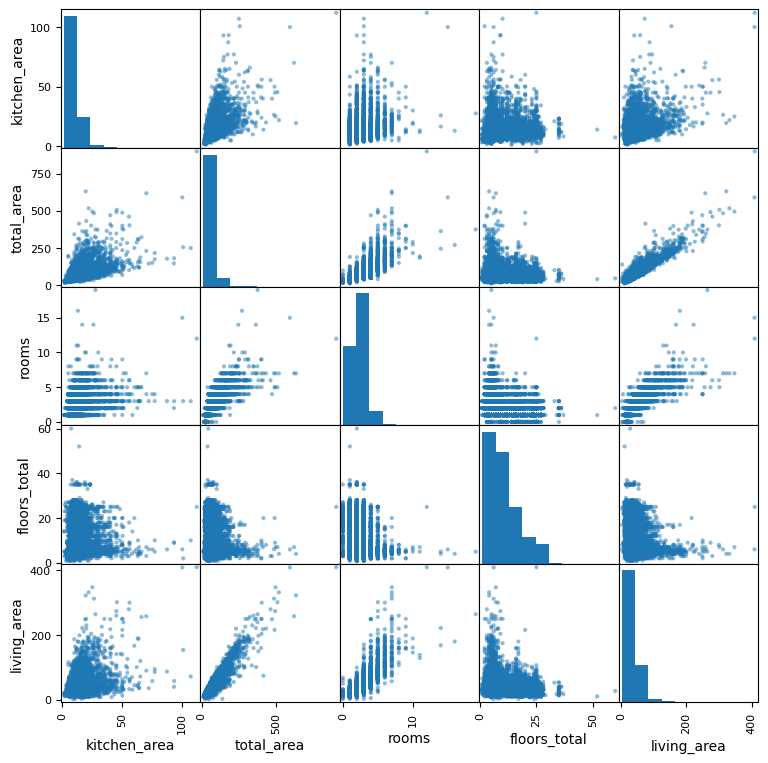

Сколько осталось пропущенных значений
10

Сколько осталось пропущенных значений
0



In [11]:
# Жилая площадь #
# Добавление столбца с соотношением жилой площади к общей
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['studio'] = data['studio'].astype(int)

#проверка начального датафрейма
print('Медиана соотношения жилой площади к общей')
print(data['living_to_total_area'].median())
print()
print('Вывод первых строк столбца с соотношением жилой площади к общей')
print(data['living_to_total_area'].head(10))
print()

#создание датафрейма без отсутствующих значений в столбце living_area
data_livingarea_filtered = data.copy()
data_livingarea_filtered = data_livingarea_filtered.dropna(subset = ['living_area']).reset_index(drop=True)

#проверка коэффициентов корреляции между характеристиками
print('Матрица коэффициентов корреляции')
print(data_livingarea_filtered[['kitchen_area', 'total_area', 'rooms', 'floors_total', 'living_area']].corr())
print()
pd.plotting.scatter_matrix(data_livingarea_filtered[['kitchen_area', 'total_area', 'rooms', 'floors_total', 'living_area']], figsize=(9, 9))
plt.show()

#заполнение пропущенных значений в столбце living_to_total_area
for i in range(len(data)):
    if data.isna().loc[i, 'living_to_total_area'] == True:
        room = data.loc[i, 'rooms']
        t_area = data.loc[i, 'total_area']
        data.loc[i, 'living_to_total_area'] = data_livingarea_filtered[(data_livingarea_filtered['rooms'] == room)&(data_livingarea_filtered['total_area'] <= (t_area+10))&(data_livingarea_filtered['total_area'] >= (t_area-10))]['living_to_total_area'].median()

#контрольная проверка
print('Сколько осталось пропущенных значений')
print(data['living_to_total_area'].isna().sum()) 
print()

#повторное заполнение без фильтра по количеству комнат
for i in range(len(data)):
    if data.isna().loc[i, 'living_to_total_area'] == True:
       
        t_area = data.loc[i, 'total_area']
        data.loc[i, 'living_to_total_area'] = data_livingarea_filtered[(data_livingarea_filtered['total_area'] >= (t_area-30))&(data_livingarea_filtered['total_area'] <= (t_area+30))]['living_to_total_area'].median()

#контрольная проверка 2
print('Сколько осталось пропущенных значений')
print(data['living_to_total_area'].isna().sum()) 
print()

#заполнение пропущенных значений в исходном столбце
data['living_area'] = data['living_to_total_area'] * data['total_area']
del data['living_to_total_area']


Матрица коэффициентов корреляции
                       kitchen_to_total_area  kitchen_area  total_area  \
kitchen_to_total_area               1.000000      0.431792   -0.317664   
kitchen_area                        0.431792      1.000000    0.609121   
total_area                         -0.317664      0.609121    1.000000   
rooms                              -0.590372      0.269945    0.765168   
floors_total                        0.350479      0.163944   -0.061408   
living_area                        -0.475948      0.434120    0.941090   

                          rooms  floors_total  living_area  
kitchen_to_total_area -0.590372      0.350479    -0.475948  
kitchen_area           0.269945      0.163944     0.434120  
total_area             0.765168     -0.061408     0.941090  
rooms                  1.000000     -0.213241     0.845859  
floors_total          -0.213241      1.000000    -0.157932  
living_area            0.845859     -0.157932     1.000000  



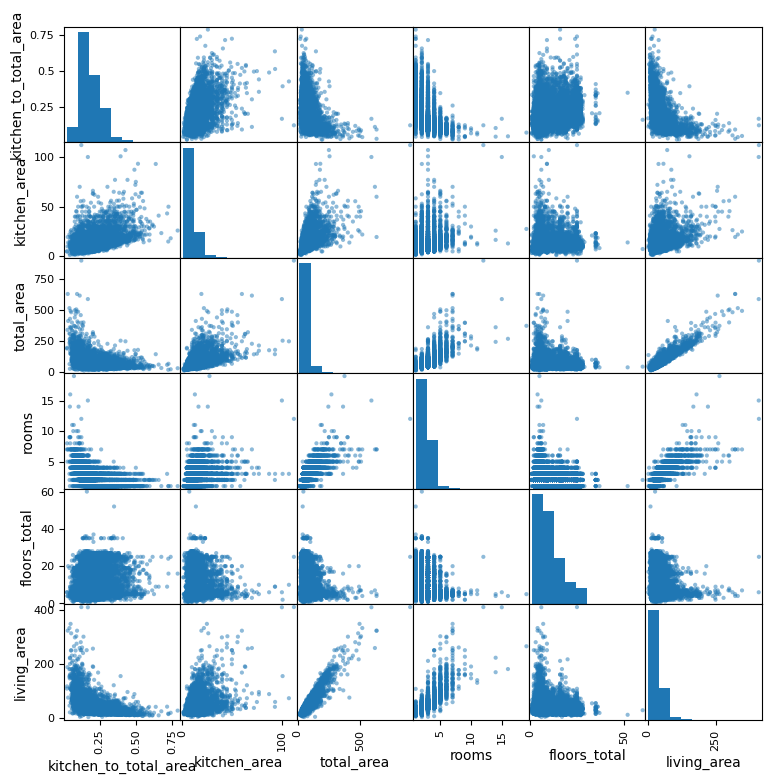

Медиана площади кухни от этажности дома
floors_total
1.0      9.100
2.0      7.000
3.0      8.500
4.0      9.800
5.0      7.000
6.0     11.000
7.0     10.700
8.0     12.550
9.0      7.600
10.0    10.800
11.0    11.350
12.0     9.800
13.0    11.520
14.0     9.250
15.0    10.400
16.0    10.700
17.0    11.000
18.0    11.000
19.0    11.000
20.0    12.000
21.0    11.000
22.0    11.000
23.0    11.500
24.0    11.115
25.0    11.000
26.0    11.450
27.0    10.000
28.0    10.550
29.0    14.400
33.0    21.000
35.0    14.500
36.0    12.000
37.0     8.340
52.0    14.000
60.0     7.400
Name: kitchen_area, dtype: float64

Средняя площадь кухни от этажности дома
floors_total
1.0      9.852632
2.0      8.389398
3.0     10.539325
4.0     11.432069
5.0      8.605918
6.0     14.271828
7.0     13.171004
8.0     14.626676
9.0      8.495274
10.0    11.815023
11.0    12.680914
12.0    10.655599
13.0    13.416473
14.0    10.686733
15.0    11.538364
16.0    11.981554
17.0    11.831508
18.0    12.430687
19.0    1

In [12]:
# Площадь кухни #
# Изменение типа данных в столбце апартаменты, свободная планировка, добавление столбца с соотношением площади кухни к общей
data['is_apartment'] = data['is_apartment'].astype(int)
data['open_plan'] = data['open_plan'].astype(int)
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

#создание датафрейма без отсутствующих значений в столбце kitchen_area
data_kitchenarea_filtered = data.copy()
data_kitchenarea_filtered = data_kitchenarea_filtered.dropna(subset = ['kitchen_area']).reset_index(drop=True)

print('Матрица коэффициентов корреляции')
print(data_kitchenarea_filtered[['kitchen_to_total_area', 'kitchen_area', 'total_area', 'rooms', 'floors_total', 'living_area']].corr())
print()

pd.plotting.scatter_matrix(data_kitchenarea_filtered[['kitchen_to_total_area', 'kitchen_area', 'total_area', 'rooms', 'floors_total', 'living_area']], figsize=(9, 9))
plt.show()

print('Медиана площади кухни от этажности дома')
print(data_kitchenarea_filtered.groupby('floors_total')['kitchen_area'].median())
print()
print('Средняя площадь кухни от этажности дома')
print(data_kitchenarea_filtered.groupby('floors_total')['kitchen_area'].mean())
print()


In [13]:
#заполнение пропущенных значений в столбце kitchen_to_total_area
for i in range(len(data)):
    if data.isna().loc[i, 'kitchen_to_total_area'] == True:
        area = data.loc[i, 'total_area']
        floors = data.loc[i, 'floors_total']
        data.loc[i, 'kitchen_to_total_area'] = data_kitchenarea_filtered[(data_kitchenarea_filtered['total_area'] <= (area+5))&(data_kitchenarea_filtered['total_area'] >= (area-5))&(data_kitchenarea_filtered['floors_total'] == floors)]['kitchen_to_total_area'].median()

#контрольная проверка
print(data['kitchen_to_total_area'].isna().sum()) 
print()

#повторная упрощенная замена по общей площади квартиры +-10м2.
for i in range(len(data)):
    if data.isna().loc[i, 'kitchen_to_total_area'] == True:
        area = data.loc[i, 'total_area']
        data.loc[i, 'kitchen_to_total_area'] = data_kitchenarea_filtered[(data_kitchenarea_filtered['total_area'] <= (area+10))&(data_kitchenarea_filtered['total_area'] >= (area-10))]['kitchen_to_total_area'].median()

#контрольная проверка
print(data['kitchen_to_total_area'].isna().sum()) 
print()

# Восстановление значений исходного столбца
data['kitchen_area'] = data['kitchen_to_total_area'] * data['total_area']
del data['kitchen_to_total_area']


79

0



In [14]:
# Восстановление пропущенных значений в этажности дома
for i in range(len(data)):
    if data.isna().loc[i, 'floors_total'] == True:
        floor = data.loc[i, 'floor']
        data.loc[i, 'floors_total'] = data[data['floor'] == floor]['floors_total'].median()

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  int64  
 10  studio                23699 non-null  int64  
 11  open_plan             23699 non-null  int64  
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Переходим к пропущенным значениям. Есть 2 группы характеристик, связанные с геолокацией (автоматически рассчитываемые), и внесенные в объявления вручную. Разберемся сначала со второй группой.
Как было выявлено в предыдущем разделе, следующие характеристики содержат пропущенные значения: высота потолков, количество этажей в доме, жилая площадь и площадь кухни, тип жилья (апартаменты/нет). Для редактирования исходной таблицы создадим рабочую - data.
- Апартаменты: вероятно для указания типа апартаментов в объявлении требуется это отметить отдельно (поставить галку, выбрать из списка, ...), вероятнее всего объъявления в которых не указан тип является обычной квартирой. Меняем NaN на False.
- Жилая площадь: логичнее всего заменить отсутствующие значения исходя из среднего соотношения жилой и общей площади для подобного жилья. Создадим копию датафрейма, в которой удалены отсутствующие значения в столбце living_area. Из приведенных 22 характеристик хоть как-то помочь нам могут этажность дома, кол-во комнат в квартире, общая площадь, площадь кухни. При этом, чем больше фильтров мы поставим, тем меньше будет выборка, по которой будет рассчитано соотношение, и тем больше шанс заменить NaN на смещенное значение. Выведя корреляционную матрицу и попарные диаграммы рассеивания, приходим к выводу, что максимальная корреляция у жилой площади с количеством комнат и общей площадью. Находим пропущенные значения, сортируем созданный датафрейм по количеству комнат и общей площади, заменяем пропущенные значения в исходном. Проверка показывает что метод заменил пропущенные значения.
- Площадь кухни: Заменять будем по тому же принципу. Характеристики квартиры, которые могут влиять на площадь кухни следующие: total_area, rooms, floors_total, living_area, is_apartment, studio, open_plan.
Попробуем отсечь наименее значимые характеристики с помощью методов groupby, corr, построения матрицы и диаграмм рассеивания. Заменим предварительно тип данных в столбцах studio и open_plan на int для того, чтобы работать с методом построения диаграмм рассеивания и т.д. Создадим копию датафрейма без пропущенных значений в стобце kitchen_area.
Выведем корреляционную матрицу для выбранных параметров. Наибольшая корреляция с параметрами общая площаь и жилая площадь, остальные параметры сравнительно не велики. Значение NaN со studio и open_plan, скорее всего в выборку вошли значения только одного типа, проверим. Студий в нашей выборке не оказалось, следовательно для всех студий значения площади кухни не известны. Аналогичная ситуация и с open_plan, следовательно эти 2 параметра нам точно не подходят для восстановления значений в kitchen_area. Более того, для последующего исследования заполнять эти строки было бы неправильно, поскольку их не с чем сопоставить. Вернемся к остальным параметрам, построим попарные диаграммы рассеивания. Видно, что наибольший коэффициент корреляции у kitchen_area с total_area - 0.61, это же видно и на диаграмме рассеивания. Поэтому напрашивается вариант восстанавливать по соотношению площади кухни к общей в зависимости от общей площади квартиры. Проведя анализ матриц рассеивания с параметром kitchen_to_total_area с остальными, можно отметить, что зависимость схожая с параметрами кол-во комнат, жилая площадь, при этом они в свою очередь коррелируют друг с другом. Особняком стоит этажность дома, с одной стороны корреляция не большая, но важно отметить, что при увеличении этажности разброс kitchen_to_total_area сужается. С увеличением этажности дома диапазон площадей кухни снижается, проверим методом groupby. Медианные, как и средние, значения неравномерно распределены, более того этажность не коррелирует с общей площадью. Сортировка по двум параметрам может помочь повысить точность замены, особенно для типовых домов с 5, 9 и 12 этажами, которых в выборке достаточно много. Итого - пропущенные значения площади кухни восстанавливаем по соотношению площади кухни к общей по квартирам той же площади и этажности. Зададим некоторый шаг в площади квартиры (+-5 м2) чтобы выборки по каждому пропущенному значению были больше. 2199 из 2278 значений мы заменили. Для остальных очевидно выборки маловаты, поскольку пропущенные значения осталиь в нетиповых квартирах. Упростим фильтр для них, оставим только общую площадь +-10 м2. Теперь восстановим непосредственно отсутствующие значения в столбце kitchen_area. 
- Высота потолков: Во-первых, пропущено около 40% значений. Во-вторых о высоте потолков обычно могут сказать такие характеристики как класс жилья (бизнес, элит, ..), панельный/монолит, год постройки. Ничего из этих характеристик в датафрейме не представлено, поэтому пропущенные значения заменять не на что. Любые гипотезы только исказят будущие выводы.
- Этажность дома: отсутствуют всего 86 значений. Напрашивается только один вариант замены: смотрим этажность домов среди объявлений на том же этаже, заменяем на среднюю/медиану. Поступив таким образом, 86 объявлений (0,3% выборки) будут отнесены к группе не первого этажа, и совсем редко - последнего. Таким образом мы исказим данные, не получив более обширного набора данных, восстанавливать не будем.

Итак, проверим датафрейм. Порядок, изменим тип данных и приступим к исследованию.

<a id="23"></a>
### Изменение типов данных

In [15]:
#print(initial_data['first_day_exposition'].head())

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#print()

data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['locality_name'] = data['locality_name'].astype('str')   #назначаем тип строки
data.info()
print()
print(data.head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  int64         
 10  studio                23699 non-null  int64         
 11  open_plan             23699 non-null  int64         
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Как и было определено в начале работы, ниже перечень столбцов, в которых рационально изменить тип данных (из тех, где еще не поменяли):
- first_day_exposition: удобнее будет работать с форматом datetime
- last_price: меняем на int
- floors_total: изменим на int, после замены появились не целые значения.
- balcony: изменим на int
- parks_around3000, ponds_around_3000: меняем на int
- days_exposition: изменим на int
- locality_name: изменим на тип "строка"

<a id="3"></a>
## Рассчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [16]:
data.info()
# Добавление столбцов для следующих этапов исследования
#квадратный метр
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].astype('int')
print(data['price_per_meter'].head(10))
print()

#день недели, месяц и год публикации
data['exposition_weekday'] = data['first_day_exposition'].dt.day_name()
data['exposition_month'] = data['first_day_exposition'].dt.month_name()
data['exposition_year'] = data['first_day_exposition'].dt.year
print(data.head(10))
print()

#этаж квартиры
def floor_change (floor, floors_total):
    if floor == 1:
        return 'первый'
    else:
        if floor == floors_total:
            return 'последний'
        else:
            return 'другой'
    
data['floor_type'] = data.apply(lambda x: floor_change(x['floor'], x['floors_total']), axis = 1)
print(data['floor_type'].unique())
print()

#Отношение жилой площади и площади кухни к общей
data['living_to_total_area'] = data['living_area'] / data['total_area']
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  int64         
 10  studio                23699 non-null  int64         
 11  open_plan             23699 non-null  int64         
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

<a id="4"></a>
## Исследовательский анализ данных

4.1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Площадь квартир:
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


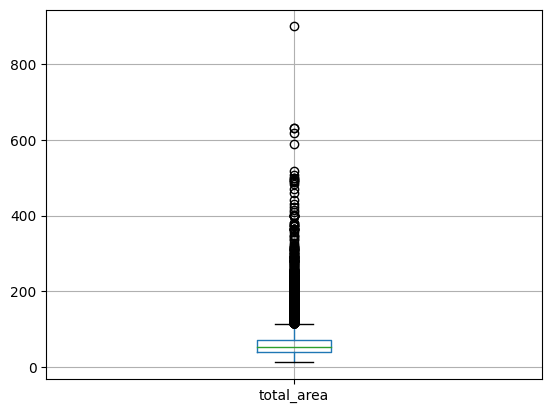

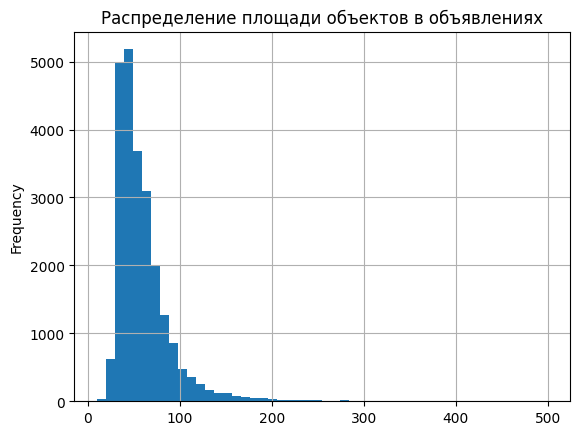

In [17]:
# 1 #
# Площадь квартир
print("Площадь квартир:")
print(data['total_area'].describe())

data.boxplot(column = 'total_area')
plt.show()

data.plot(kind = 'hist', title = 'Распределение площади объектов в объявлениях', y = 'total_area', range = (10, 500), bins = 50, linewidth = 2, 
          grid = True, legend = False)
plt.show()


Цена квартир:
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


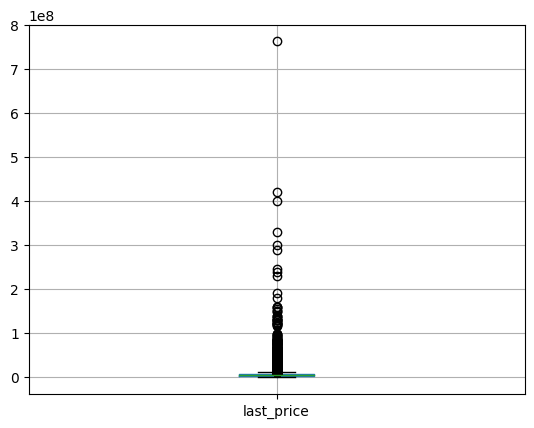

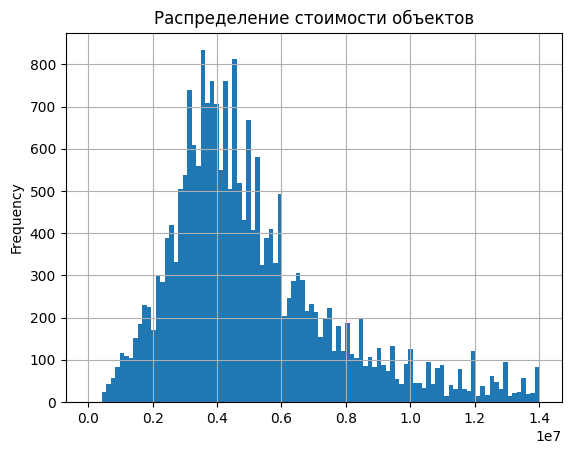

In [18]:
# Цена квартир
print("Цена квартир:")
print(data['last_price'].describe())

data.boxplot(column = 'last_price')
plt.show()

data.plot(kind = 'hist', title = 'Распределение стоимости объектов', 
          y = 'last_price', range = (0, 14000000), bins = 100, linewidth = 2, grid = True, legend = False)
plt.show()


Число комнат
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


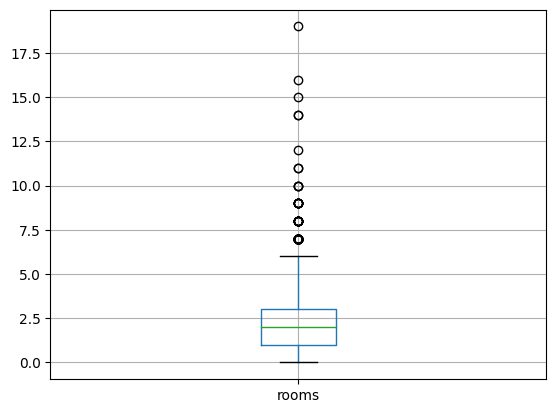

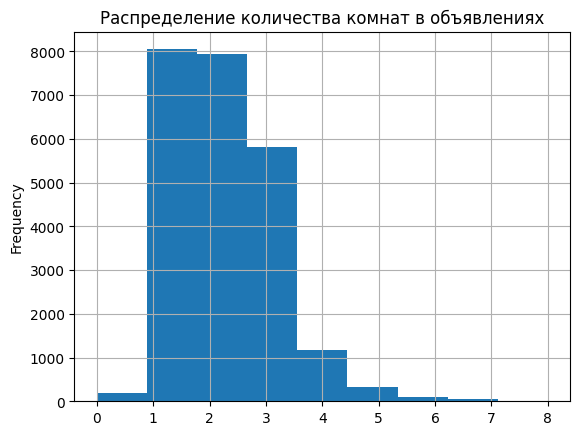

In [19]:
# Число комнат
print("Число комнат")
print(data['rooms'].describe())

data.boxplot(column = 'rooms')
plt.show()

data.plot(kind = 'hist', title = 'Распределение количества комнат в объявлениях', 
          y = 'rooms', range = (0, 8), bins = 9, linewidth = 2, grid = True, legend = False)
plt.show()

Высота потолков
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


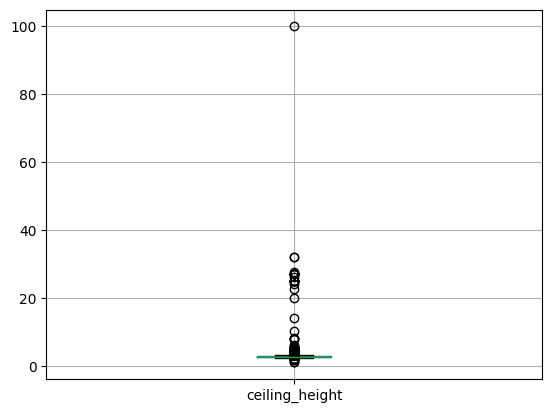

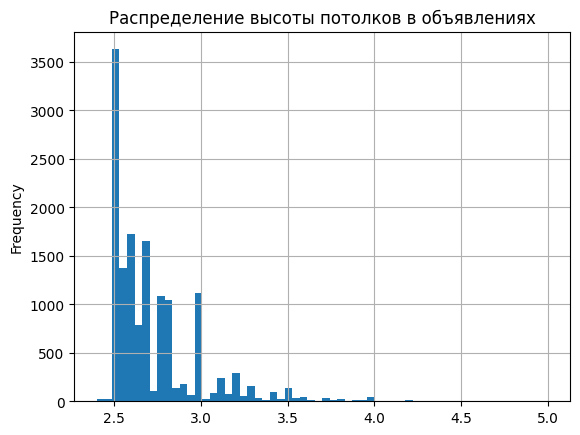

In [20]:
# Высота потолков
print('Высота потолков')
print(data['ceiling_height'].describe())

data.boxplot(column = 'ceiling_height')
plt.show()

data.plot(kind = 'hist', title = 'Распределение высоты потолков в объявлениях', 
          y = 'ceiling_height', range = (2.4, 5), bins = 60, linewidth = 2, grid = True, legend = False)
plt.show()

4.2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

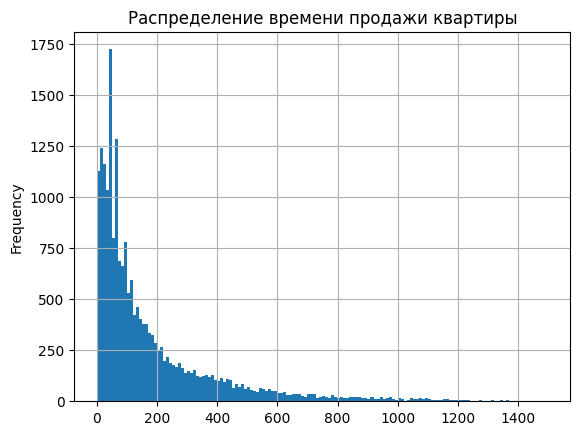

Общее описание значений времени продажи
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


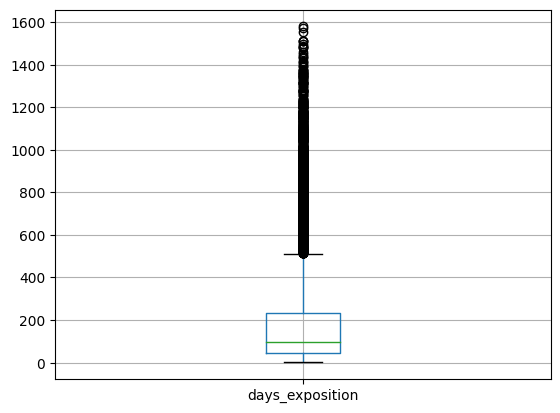

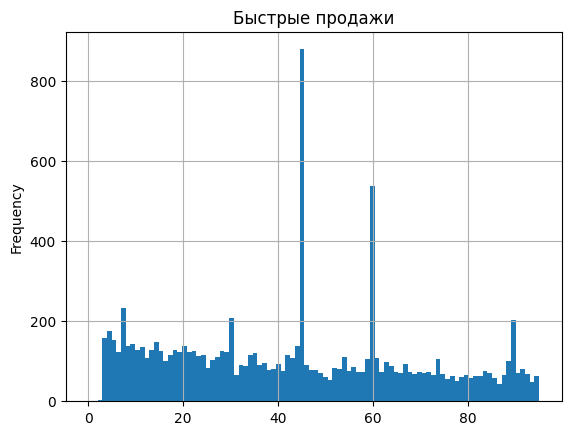

Сколько квартир продаются более 1,5 лет:
6.2%

Сколько квартир продаются быстрее 2 недель:
7.5%


In [21]:
# 2 #
#Время продажи квартиры

data.plot(kind = 'hist', title = 'Распределение времени продажи квартиры', 
          y = 'days_exposition', range = (0, 1499), bins = 150, linewidth = 2, grid = True, legend = False)
plt.show()

print('Общее описание значений времени продажи')
print(data['days_exposition'].describe())

data.boxplot(column = 'days_exposition')
plt.show()

# Крайне быстрые продажи
data.plot(kind = 'hist', title = 'Быстрые продажи', 
          y = 'days_exposition', range = (0, 95), bins = 96, linewidth = 2, grid = True, legend = False)
plt.show()
print('Сколько квартир продаются более 1,5 лет:')
print('{:.1%}'.format(data[data['days_exposition'] > 550]['days_exposition'].count()/len(data)))   # около 7% квартир продаются более 1.5 лет
print()
print('Сколько квартир продаются быстрее 2 недель:')
print('{:.1%}'.format(data[data['days_exposition'] < 15]['days_exposition'].count()/len(data)))    # около 9% квартир продаются менее 2 недель


Общая площадь квартиры
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64



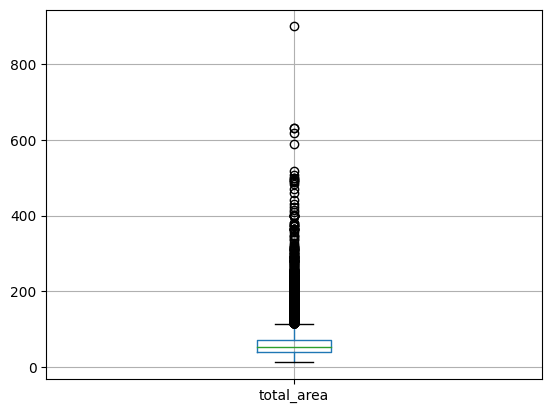

Сколько квартир с метражем более 300:
61

Цена квартиры
count    2.363800e+04
mean     6.306195e+06
std      7.770379e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.620000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64



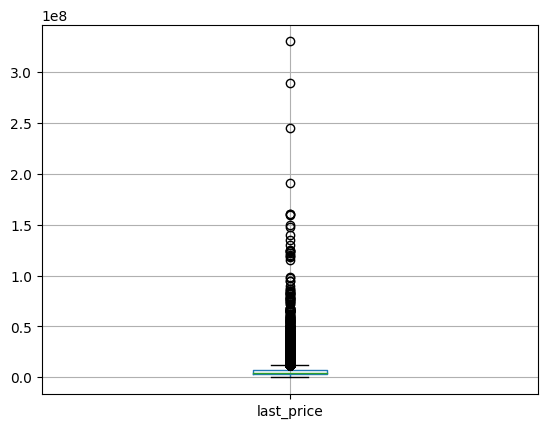

Сколько квартир с ценой свыше 50 млн руб:
99


In [22]:
# 3 # Редкие и выбивающиеся значения
# Площадь квартиры
print('Общая площадь квартиры')
print(data['total_area'].describe())
print()
data.boxplot(column = 'total_area')
plt.show()
print('Сколько квартир с метражем более 300:')
print(len(data.query('total_area > 300')))

# создадим копию датафрейма filtered_data
filtered_data = data.query('total_area <= 300').copy()
print()


# Цена квартиры
print('Цена квартиры')
print(filtered_data['last_price'].describe())
print()
filtered_data.boxplot(column = 'last_price')
plt.show()
print('Сколько квартир с ценой свыше 50 млн руб:')
print(len(filtered_data.query('last_price > 50000000')))
filtered_data = filtered_data.query('last_price <= 50000000')


Количество комнат
count    23539.000000
mean         2.050469
std          1.035893
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64



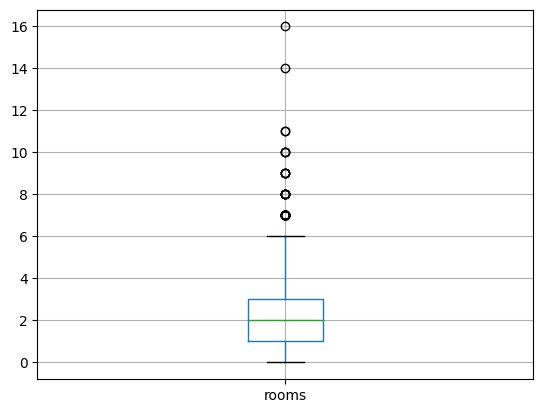

Сколько квартир с количеством комнат более 7:
18
Высота потолков
count    14385.000000
mean         2.766015
std          1.263719
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64



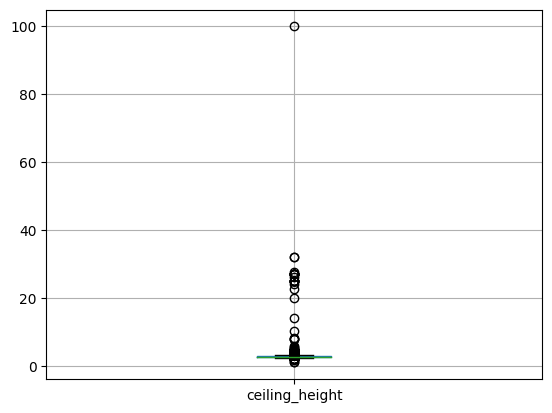

Сколько квартир с высотой потолков более 3,5 метров:
270

Сколько квартир с высотой потолков более 4 метров:
65
Жилая площадь
count    23521.000000
mean         0.564277
std          0.103102
min          0.038462
25%          0.494453
50%          0.567232
75%          0.635294
max          1.000000
Name: living_to_total_area, dtype: float64



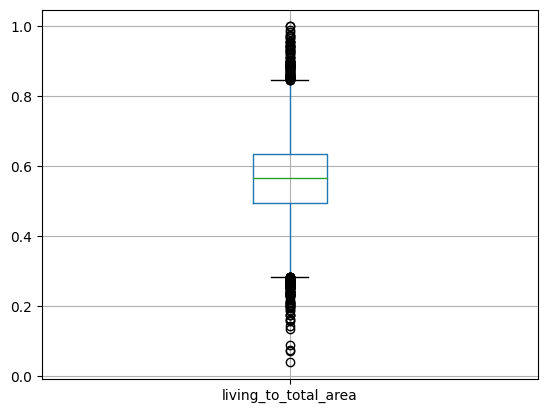

Сколько квартир с соотношением жилой к общей площади менее 0.3
185


In [23]:
# Количество комнат
print('Количество комнат')
print(filtered_data['rooms'].describe())
print()
filtered_data.boxplot(column = 'rooms')
plt.show()
print('Сколько квартир с количеством комнат более 7:')
print(len(filtered_data.query('rooms > 7')))
filtered_data = filtered_data.query('rooms <= 7')

# Высота потолков
print('Высота потолков')
print(filtered_data['ceiling_height'].describe())
print()
filtered_data.boxplot(column = 'ceiling_height')
plt.show()
print('Сколько квартир с высотой потолков более 3,5 метров:')
print(len(filtered_data.query('ceiling_height > 3.5')))
print()
print('Сколько квартир с высотой потолков более 4 метров:')
print(len(filtered_data.query('ceiling_height > 4')))

filtered_data.loc[filtered_data['ceiling_height'] <= 2.06, 'ceiling_height'] = None
filtered_data.loc[filtered_data['ceiling_height'] >= 4, 'ceiling_height'] = None

# Соотношение жилой площади к общей
print('Жилая площадь')
print(filtered_data['living_to_total_area'].describe())
print()
filtered_data.boxplot(column = 'living_to_total_area')
plt.show()
print('Сколько квартир с соотношением жилой к общей площади менее 0.3')
print(len(filtered_data.query('living_to_total_area < 0.3')))
filtered_data = filtered_data.query('living_to_total_area >= 0.2')


In [24]:
# время продажи квартиры

filtered_data['days_exposition'].describe()
filtered_data = filtered_data.query('days_exposition <= 545')


Удаление редких и выбивающихся значений:
- Площадь квартиры. Не хотелось бы выбрасывать много значений, поэтому вместо 115 кв метров (по boxplot) примем планку за 300 кв метров. Таких квартир всего 61.
- Цена квартиры. По аналогии уберем квартиры с ценой не свыше 12 млн (по boxplot), а свыше 50 млн рублей, таких менее 100.
- Число комнат. По IQR следует признать выбросами квартиры с количеством комнат свыше 6, но поскольку и в предыдущих примерах мы уменьшали количество отсекаемых объявлений, откинем с количества комнат 8 и выше.
- Высота потолков. По IQR следует отсечь значения менее 206 см и свыше 325 см. С нижней планкой мы согласны. При этом в "сталинках" высота потолков составляет 3,5 метра и в целом жилье с высотой потолков до 4 метров не кажется слишком редким. Проверим, сколько квартир свысотой поотолков более 3,5 и 4 метра соответственно, их 270 и 65. Примем за верхнюю границу планку в 4 метра.
Были замечены также сомнительные значения в столбце жилая площадь: По диаграмме ящик с усами соотношенее менее 0.3 признано выбросом, но таких 93 квартиры, установим планку в 0.2 и удалим 11 выбившихся значений.
Теперь разберемся со временем продажи квартиры. По диаграмме ящик с усами выбросами можно считать те квартиры, которые продавались более 545 дней. Удалим эти значения.

Матрица коэффициентов корреляции
                      last_price  airports_nearest  ceiling_height  \
last_price              1.000000         -0.036126        0.493840   
airports_nearest       -0.036126          1.000000       -0.104488   
ceiling_height          0.493840         -0.104488        1.000000   
city_center_distance   -0.327360          0.266556       -0.350920   
total_area              0.771298         -0.025193        0.462030   
living_area             0.663412         -0.049942        0.399505   
kitchen_area            0.597429          0.014519        0.404415   
parks_nearest           0.027791         -0.086348       -0.037813   
ponds_nearest          -0.104681          0.008166       -0.134618   

                      city_center_distance  total_area  living_area  \
last_price                       -0.327360    0.771298     0.663412   
airports_nearest                  0.266556   -0.025193    -0.049942   
ceiling_height                   -0.350920    0.46203

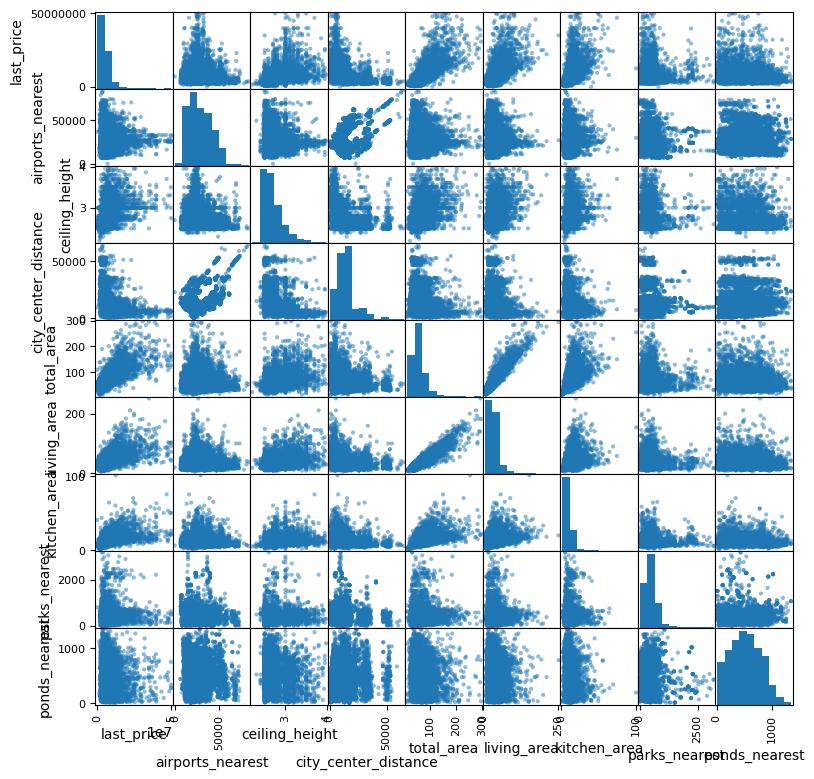

In [25]:
# 4 #   Изучение факторов, от которых зависит стоимость квартиры, и их влияния.

print('Матрица коэффициентов корреляции')
print(filtered_data[['last_price', 'airports_nearest', 'ceiling_height', 'city_center_distance',
                     'total_area', 'living_area', 'kitchen_area', 'parks_nearest', 'ponds_nearest']].corr())
print()

pd.plotting.scatter_matrix(filtered_data[['last_price', 'airports_nearest', 'ceiling_height', 'city_center_distance',
                     'total_area', 'living_area', 'kitchen_area', 'parks_nearest', 'ponds_nearest']], figsize=(9, 9))
plt.show()
#***********



Количество комнат и стоимость квартиры


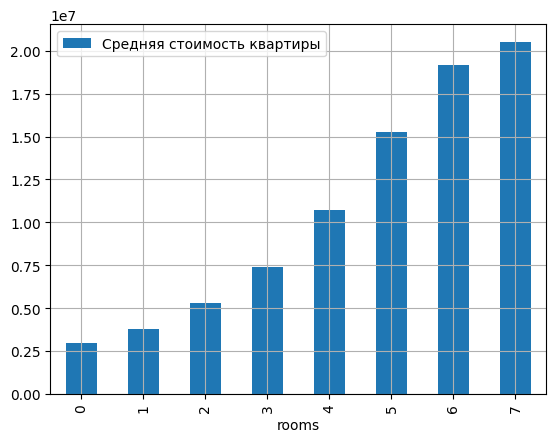

Этаж и стоимость квартиры


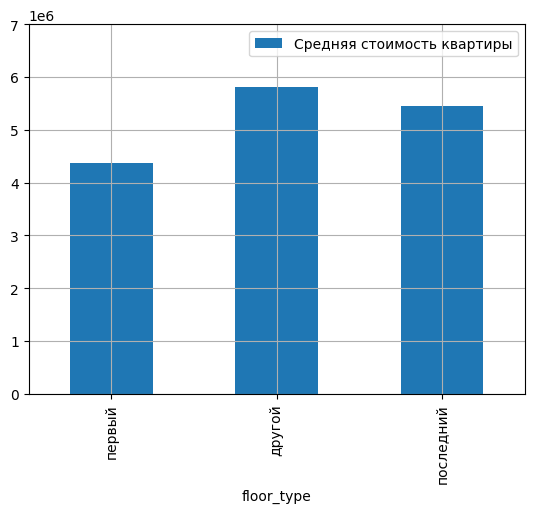

In [26]:
# Количество комнат и стоимость квартиры
print("Количество комнат и стоимость квартиры")

filtered_data.groupby('rooms')['last_price'].mean().plot(kind = 'bar', grid = True, 
                                                         label = 'Средняя стоимость квартиры', legend = True)
plt.show()

# Стоимость и этаж квартиры

print("Этаж и стоимость квартиры")
filtered_data.groupby('floor_type')['last_price'].mean().reindex(['первый', 'другой', 'последний']).plot(kind = 'bar', grid = True, ylim = (0, 7000000), 
                                                              label = 'Средняя стоимость квартиры', legend = True)
plt.show()

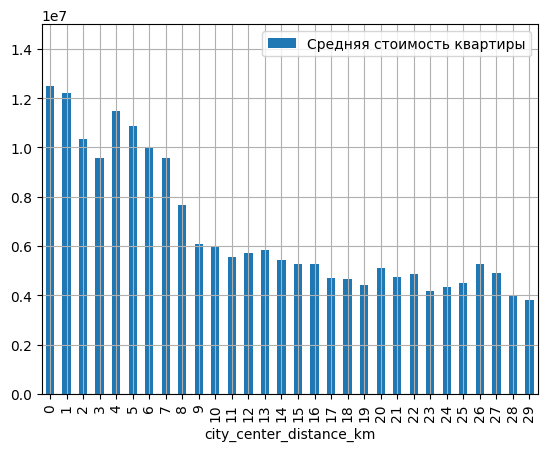

In [27]:
#Удаленность от центра и стоимость квартиры
# создадим новый столбец с расстоянием до центра в км, а потом рассчитаем средние цены по каждому диапазону (0-1 км, 1-2 км, ..)
filtered_data['city_center_distance_km'] = filtered_data['city_center_distance'] / 1000

#Пришло время создать отдельный датафрейм с объявлениями
filtered_geodata = filtered_data.copy()
filtered_geodata.dropna(subset = ['city_center_distance'], inplace = True)
filtered_geodata['city_center_distance_km'] = filtered_geodata['city_center_distance_km'].astype('int')

# А теперь отразим на графике зависимость средней цены квартиры от расстояния до центра города
filtered_geodata.groupby('city_center_distance_km')['last_price'].mean().head(30).plot(kind = 'bar', grid = True, ylim = (0, 15000000), 
                                                              label = 'Средняя стоимость квартиры', legend = True)
plt.show()


Время публикации и стоимость квартиры


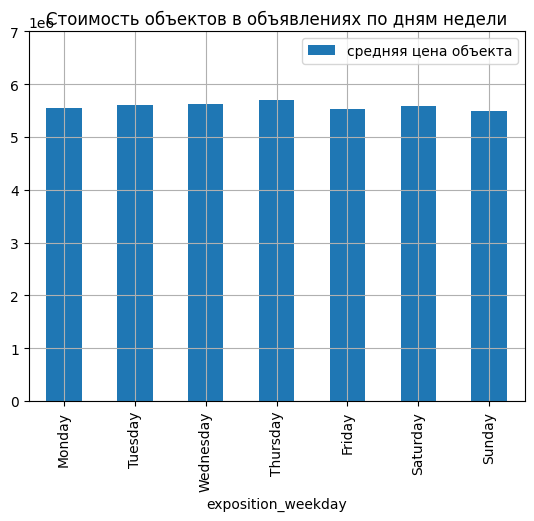

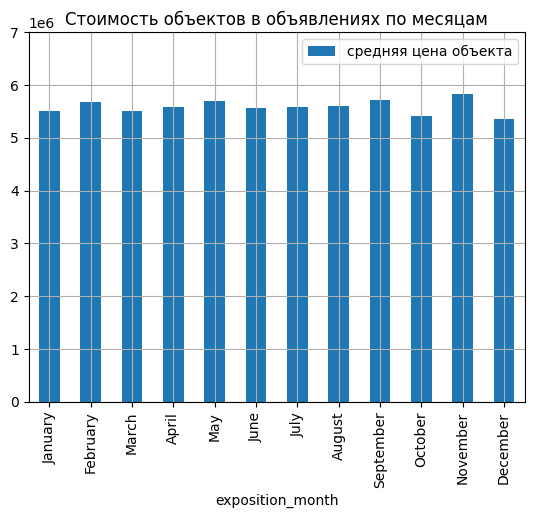

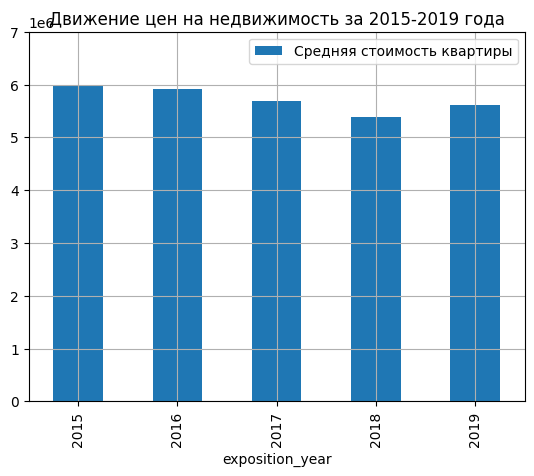

In [28]:
# Время публикации и стоимость квартиры
print("Время публикации и стоимость квартиры")

weekday = filtered_data.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = 'mean')
weekday.columns = ['средняя цена объекта']
weekday = weekday.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday.plot(kind = 'bar', grid = True, ylim = (0, 7000000), title = 'Стоимость объектов в объявлениях по дням недели')
plt.show()

month = filtered_data.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'mean')
month.columns = ['средняя цена объекта']
month = month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
month.plot(kind = 'bar', grid = True, ylim = (0, 7000000), title = 'Стоимость объектов в объявлениях по месяцам')
plt.show()

filtered_data.groupby('exposition_year')['last_price'].mean().plot(kind = 'bar', grid = True, ylim = (0, 7000000), 
                    title = 'Движение цен на недвижимость за 2015-2019 года', label = 'Средняя стоимость квартиры', legend = True)
plt.show()



Анализ коэффициентов корреляции между параметром цены квартиры и остальными количественными показывает, что наиболее важными факторами, определяющими стоимость квартиры являются: общая площадь, жилая площадь, площадь кухни, высота потолков и удаление от центра города. Далее построим гистограммы для определения зависимости от категориальных переменных (число комнат, этаж, день недели, месяц, год). Среди категориальных переменных отметим важное влияние количества комнат, этажа. Что касается времени публикации объявления, наиболее интересна зависимость цены объекта от года объявления, она отражает динамику цен на среднесрочном периоде. Пик цен пришелся на 2015 год, далее средняя стоимость квартир падала и достигла минимума в 2018 году, со средней ценой на 10% ниже чем в 2015. В 2019 году отмечается рост цен в пределах 5%.

locality_name
Санкт-Петербург      12471
поселок Мурино         522
поселок Шушары         390
Всеволожск             309
Колпино                294
поселок Парголово      290
Пушкин                 279
деревня Кудрово        272
Гатчина                246
Выборг                 193
Name: locality_name, dtype: int64



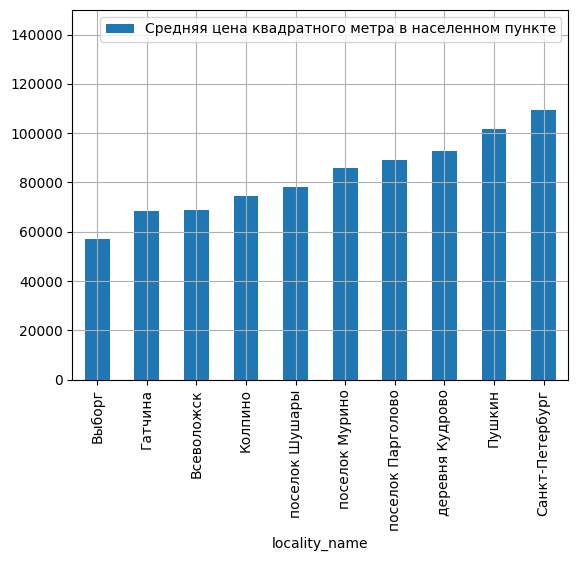

/var/folders/xp/qz3qwdx54n5gr4n6wlytv_240000gn/T/ipykernel_33484/2636312872.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_spb = filtered_data[data['locality_name'] == 'Санкт-Петербург'].reset_index(drop = True)


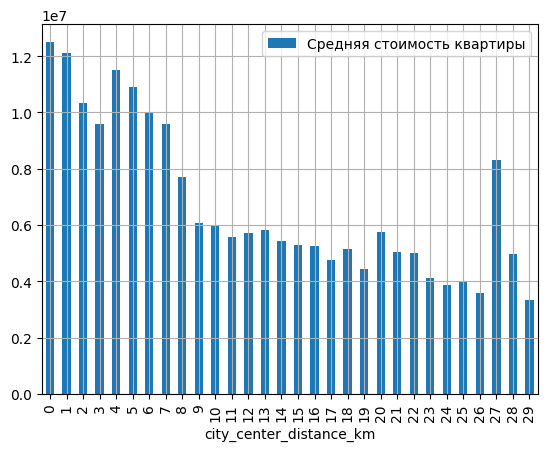

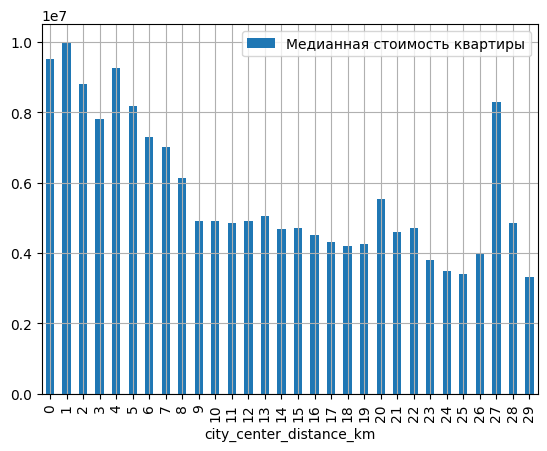

In [29]:
#10 населенных пунктов
print(filtered_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10))
print()
#средняя цена м2 по населенным пунктам
top10cities = filtered_data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ('count', 'mean', 'median')).sort_values('count', ascending = False).head(10)


top10cities['mean'] = top10cities['mean'].astype('int')
top10cities.sort_values('mean')['mean'].plot(kind = 'bar', grid = True, ylim = (0, 150000), 
                                                              label = 'Средняя цена квадратного метра в населенном пункте', legend = True)
plt.show()

# Определение понятия "центр города"
data_spb = filtered_data[data['locality_name'] == 'Санкт-Петербург'].reset_index(drop = True)

data_spb = data_spb.dropna(subset = ['city_center_distance']).reset_index(drop = True)

data_spb['city_center_distance_km'] = data_spb['city_center_distance_km'].astype('int')
data_spb.pivot_table(index = 'city_center_distance_km', values = 'last_price', aggfunc = 'mean').plot(
    kind = 'bar', y = 'last_price', linewidth = 4,  label = 'Средняя стоимость квартиры', grid=True, legend = True)
plt.show()    
data_spb.pivot_table(index = 'city_center_distance_km', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar', y = 'last_price', linewidth = 4,  label = 'Медианная стоимость квартиры', grid=True, legend = True)
plt.show()




Исходя из представленного на графике изменения цен на квартиры в зависимости от расстояния до центра, можно заметить пркращение существенного падения цен на удалении порядка 8-9 км.

In [30]:
#10 Квартиры в центре
data_spb_center = data_spb.query('city_center_distance <= 8500')  

print('Площадь квартир в СПБ')
print(data_spb['total_area'].describe())
print()
print('Площадь квартир в центре СПБ')
print(data_spb_center['total_area'].describe())
print()

print('Стоимость квартир в СПБ')
print(data_spb['last_price'].describe())
print()
print('Стоимость квартир в центре СПБ')
print(data_spb_center['last_price'].describe())
print()

print('Количество комнат в квартирах в СПБ')
print(data_spb['rooms'].describe())
print()
print('Количество комнат в квартирах в центре СПБ')
print(data_spb_center['rooms'].describe())
print()

print('Высота потолков в квартирах в СПБ')
print(data_spb['ceiling_height'].describe())
print()
print('Высота потолков в квартирах в центре СПБ')
print(data_spb_center['ceiling_height'].describe())
print()



Площадь квартир в СПБ
count    12448.000000
mean        59.702934
std         29.141956
min         12.000000
25%         40.800000
50%         52.000000
75%         70.000000
max        297.500000
Name: total_area, dtype: float64

Площадь квартир в центре СПБ
count    2921.000000
mean       79.349712
std        39.687529
min        12.000000
25%        51.000000
50%        71.000000
75%        96.300000
max       297.500000
Name: total_area, dtype: float64

Стоимость квартир в СПБ
count    1.244800e+04
mean     6.676423e+06
std      4.789549e+06
min      1.219000e+04
25%      4.070000e+06
50%      5.200000e+06
75%      7.400000e+06
max      5.000000e+07
Name: last_price, dtype: float64

Стоимость квартир в центре СПБ
count    2.921000e+03
mean     1.038210e+07
std      7.295609e+06
min      1.686000e+06
25%      5.970000e+06
50%      8.176000e+06
75%      1.200000e+07
max      5.000000e+07
Name: last_price, dtype: float64

Количество комнат в квартирах в СПБ
count    12448.000000
mean

In [31]:
# 10.1 Корреляционный анализ количественных переменных
print('Матрица коэффициентов корреляции для всего города')
print(data_spb[['last_price', 'airports_nearest', 'ceiling_height', 'city_center_distance',
                     'total_area', 'living_area', 'kitchen_area', 'parks_nearest', 'ponds_nearest']].corr())
print()
print('Матрица коэффициентов корреляции для центра города')
print()
print(data_spb_center[['last_price', 'airports_nearest', 'ceiling_height', 'city_center_distance',
                     'total_area', 'living_area', 'kitchen_area', 'parks_nearest', 'ponds_nearest']].corr())
print()



Матрица коэффициентов корреляции для всего города
                      last_price  airports_nearest  ceiling_height  \
last_price              1.000000         -0.016052        0.482404   
airports_nearest       -0.016052          1.000000       -0.108539   
ceiling_height          0.482404         -0.108539        1.000000   
city_center_distance   -0.392190          0.175726       -0.537093   
total_area              0.797730         -0.014161        0.482291   
living_area             0.692137         -0.041726        0.429807   
kitchen_area            0.612626          0.025514        0.398131   
parks_nearest           0.018963         -0.069764       -0.050015   
ponds_nearest          -0.118232          0.066518       -0.145326   

                      city_center_distance  total_area  living_area  \
last_price                       -0.392190    0.797730     0.692137   
airports_nearest                  0.175726   -0.014161    -0.041726   
ceiling_height                   -0.

Сравнивая коэффицентры корреляции между стоимостью квартиры и прочими количественными переменными отметим, что набор факторов и их роль сравнимы для квартир в СПБ и его центре. При этом, корреляция стоимости квартиры в центре города с ценообразующими факторами несколько ниже чем для всего города.

Количество комнат и стоимость квартиры
Средние цены от количества комнат для всего города и только центральной части

       во всем городе  в центре города
rooms                                 
0        3.512964e+06     4.646300e+06
1        4.346983e+06     6.172210e+06
2        6.304569e+06     8.382689e+06
3        8.573332e+06     1.192628e+07
4        1.183519e+07     1.463518e+07
5        1.633333e+07     1.720926e+07
6        1.925175e+07     1.988795e+07
7        2.112524e+07     2.112524e+07



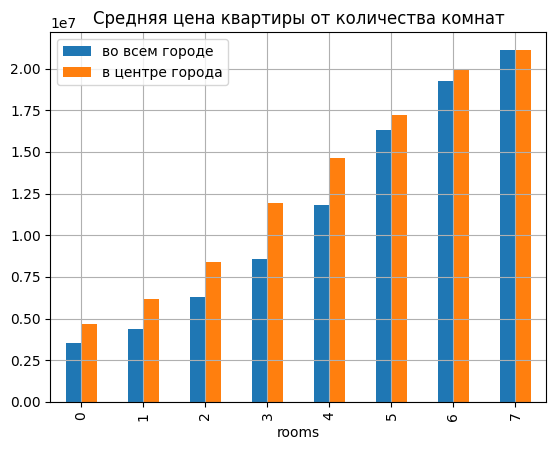

In [32]:
#Сравнение зависимостей стоимости квартир от различных категориальных факторов для центра города и всего СПБ

# 1 Количество комнат
print("Количество комнат и стоимость квартиры")
rooms_spb = data_spb.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
rooms_spb_center = data_spb_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')

rooms_spb.columns = ['average_spb_price']
rooms = rooms_spb.copy()
rooms['average_center_spb_price'] = rooms_spb_center['last_price']
rooms.columns = ['во всем городе', 'в центре города']

print('Средние цены от количества комнат для всего города и только центральной части')
print()
print(rooms)
print()
rooms.plot(kind = 'bar', title = 'Средняя цена квартиры от количества комнат', grid = True, legend = True)
plt.show()


Зависимость стоимости квартиры от этажа в СПБ и его центре

            во всем городе  в центре города
floor_type                                 
другой        6.778124e+06     1.084947e+07
первый        5.482985e+06     7.420984e+06
последний     7.014226e+06     1.031845e+07


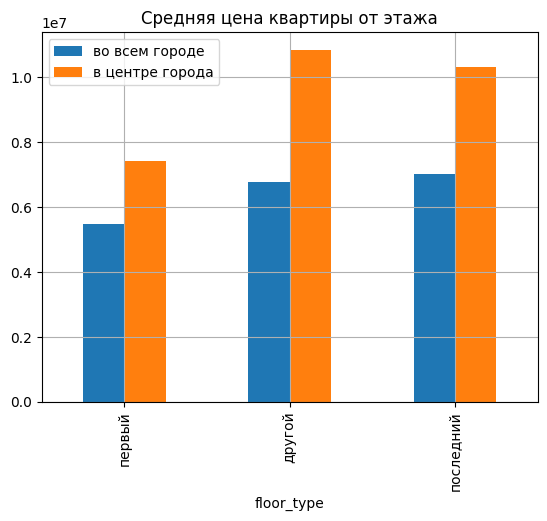

In [33]:
# 2 Стоимость и этаж квартиры

print("Зависимость стоимости квартиры от этажа в СПБ и его центре")
print()
floor_spb = data_spb.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'mean')
floor_spb_center = data_spb_center.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'mean')


floor_spb.columns = ['во всем городе']
floor_spb['в центре города'] = floor_spb_center['last_price']
print(floor_spb)
floor_spb = floor_spb.reindex(['первый', 'другой', 'последний'])

floor_spb.plot(kind = 'bar', title = 'Средняя цена квартиры от этажа', grid = True, legend = True)
plt.show()


Зависимость стоимости квартиры от расстояния до центра города в СПБ и его центре
Коэффициент корреляции между стоимостью объекта и расстоянием до центра для квартир в Санкт-Петербурге:
-0.39

Коэффициент корреляции между стоимостью объекта и расстоянием до центра для квартир в центре Санкт-Петербурга:
-0.10


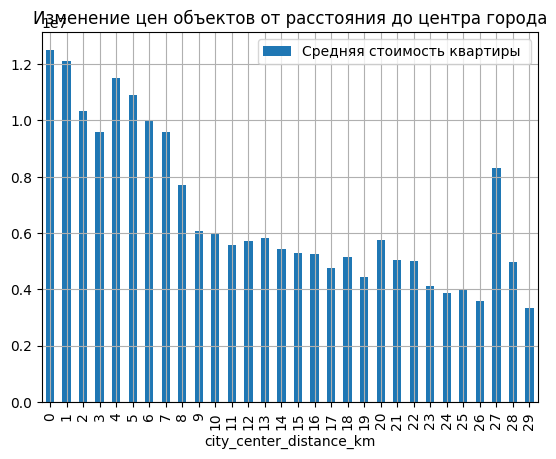

In [34]:
#3 удаленность от центра
print("Зависимость стоимости квартиры от расстояния до центра города в СПБ и его центре")
print('Коэффициент корреляции между стоимостью объекта и расстоянием до центра для квартир в Санкт-Петербурге:')
print('{:.2f}'.format(data_spb['last_price'].corr(data_spb['city_center_distance'])))
print()
print('Коэффициент корреляции между стоимостью объекта и расстоянием до центра для квартир в центре Санкт-Петербурга:')
print('{:.2f}'.format(data_spb_center['last_price'].corr(data_spb_center['city_center_distance'])))

data_spb.pivot_table(index = 'city_center_distance_km', values = 'last_price', aggfunc = 'mean').plot(
    kind = 'bar', title = 'Изменение цен объектов от расстояния до центра города', y = 'last_price', label = 'Средняя стоимость квартиры ', grid=True, legend = True)
plt.show()



Время публикации и стоимость квартиры

По дням недели


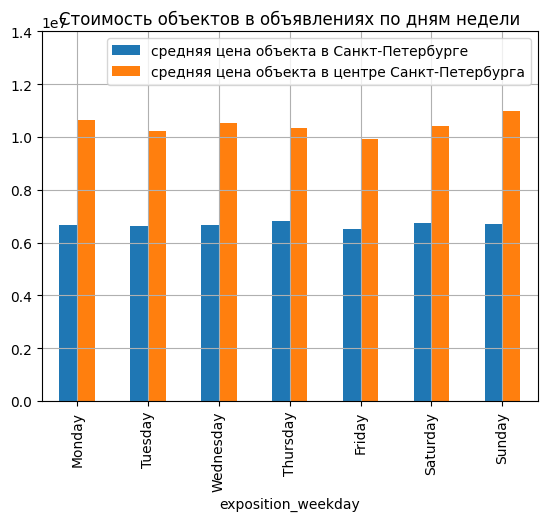

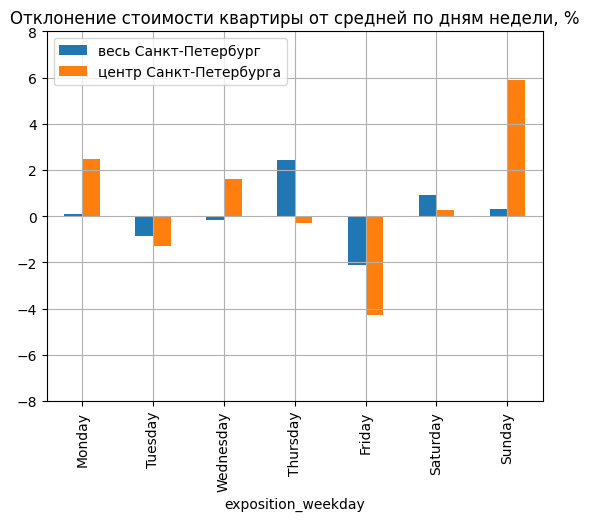

In [35]:
# 4 Дата размещения
print("Время публикации и стоимость квартиры")
print()
print('По дням недели')
weekday_spb = data_spb.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = 'mean')
weekday_spb_center = data_spb_center.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = 'mean')

weekday_delta = weekday_spb.copy()
weekday_delta.columns = ['весь Санкт-Петербург']
weekday_delta['центр Санкт-Петербурга'] = weekday_spb_center['last_price']
weekday_delta['весь Санкт-Петербург'] = 100 * (weekday_delta['весь Санкт-Петербург']/data_spb['last_price'].mean() - 1)
weekday_delta['центр Санкт-Петербурга'] = 100 * (weekday_delta['центр Санкт-Петербурга']/data_spb_center['last_price'].mean() - 1)
weekday_delta = weekday_delta.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_spb.columns = ['средняя цена объекта в Санкт-Петербурге']
weekday_spb['средняя цена объекта в центре Санкт-Петербурга'] = weekday_spb_center['last_price']
#print(weekday_spb)
weekday_spb = weekday_spb.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_spb.plot(kind = 'bar', grid = True, ylim = (0, 14000000), title = 'Стоимость объектов в объявлениях по дням недели', legend = True)
plt.show()

weekday_delta.plot(kind = 'bar', grid = True, ylim = (-8, 8), title = 'Отклонение стоимости квартиры от средней по дням недели, %', legend = True)
plt.show()


Время публикации и стоимость квартиры

По месяцам


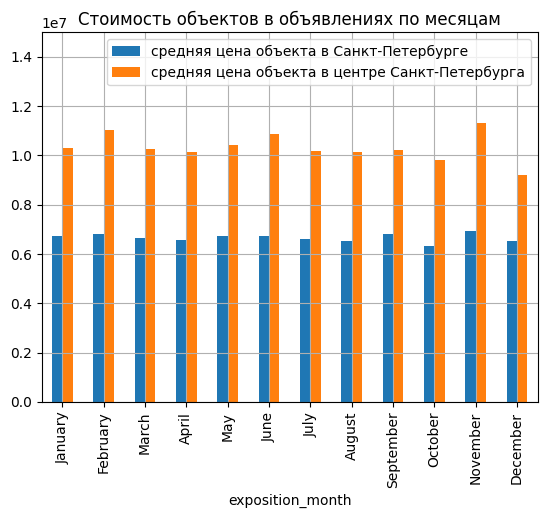

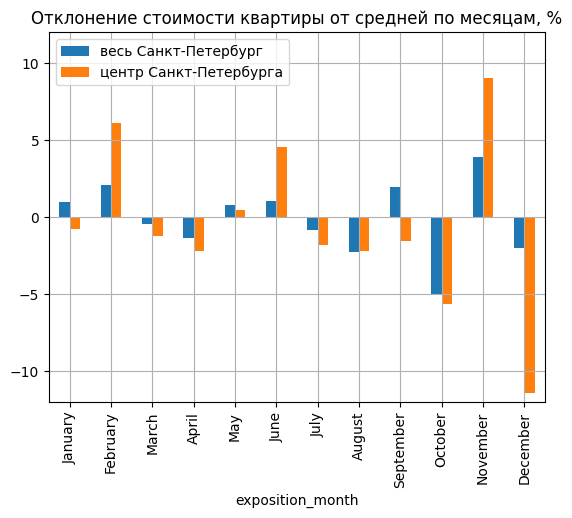

In [36]:
print("Время публикации и стоимость квартиры")
print()
print('По месяцам')

month_spb = data_spb.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'mean')
month_spb_center = data_spb_center.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'mean')

month_delta = month_spb.copy()
month_delta.columns = ['весь Санкт-Петербург']
month_delta['центр Санкт-Петербурга'] = month_spb_center['last_price']
month_delta['весь Санкт-Петербург'] = 100 * (month_delta['весь Санкт-Петербург']/data_spb['last_price'].mean() - 1)
month_delta['центр Санкт-Петербурга'] = 100 * (month_delta['центр Санкт-Петербурга']/data_spb_center['last_price'].mean() - 1)
month_delta = month_delta.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

month_spb.columns = ['средняя цена объекта в Санкт-Петербурге']
month_spb['средняя цена объекта в центре Санкт-Петербурга'] = month_spb_center['last_price']
#print(month_spb)
month_spb = month_spb.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
month_spb.plot(kind = 'bar', grid = True, ylim = (0, 15000000), title = 'Стоимость объектов в объявлениях по месяцам', legend = True)
plt.show()

month_delta.plot(kind = 'bar', grid = True, ylim = (-12, 12), title = 'Отклонение стоимости квартиры от средней по месяцам, %', legend = True)
plt.show()


Время публикации и стоимость квартиры

По годам


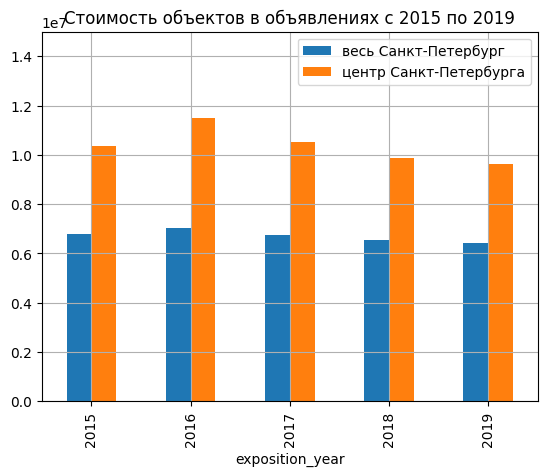

                 delta_spb  delta_spb_center
exposition_year                             
2015              2.014250         -0.022298
2016              5.457357         10.641416
2017              0.946495          1.288563
2018             -2.170805         -4.822747
2019             -3.978285         -7.117826


In [37]:
# 4 Дата размещения
print("Время публикации и стоимость квартиры")
print()
print('По годам')

year_spb = data_spb.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'mean')
year_spb_center = data_spb_center.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'mean')
year_spb['city_center'] = year_spb_center['last_price']
year_spb.columns = ['весь Санкт-Петербург', 'центр Санкт-Петербурга']
#print(year_spb)

year_spb.plot(kind = 'bar', grid = True, ylim = (0, 15000000), title = 'Стоимость объектов в объявлениях с 2015 по 2019', legend = True)
plt.show()

year_spb['delta_spb'] = 100*(year_spb['весь Санкт-Петербург']/data_spb['last_price'].mean() - 1)
year_spb['delta_spb_center'] = 100*(year_spb['центр Санкт-Петербурга']/data_spb_center['last_price'].mean() - 1)
print(year_spb[['delta_spb', 'delta_spb_center']])



<a id="5"></a>
## Общий вывод

  Проведено исследование объявлений о продаже жилой недвижимости в Санкт-Петербурге и его окрестностях. Исследованы динамика цен на недвижимость, факторы, влияющие на ее стоимость, средние, типовые и уникальные значения характеристик объектов, проведен сравнительный анализ квартир и факторов ценообразования в центре Санкт-Петербурга и всем городе. Основные выводы из исследования приведены ниже:
1. Изучив распределение и значения характеристик площадь и цена квартиры, высота потолков и число комнат, составим "портрет" типовой квартиры в Санкт-Петербурге и окрестностях: однокомнатная или двухкомнатная площадью около 50 квадратных метров с высотой потолков от 2,5 до 3 метров. Примерная стоимость такой квартиры за период исследования составляла 4-5 млн. рублей.
2. Большинство квартир продаются в период от двух недель до полутора лет, около 7,5% квартир - быстрее, и около 6% - дольше. Половина квартир продается в первые 3 месяца. Интересное наблюдение - совокупно около 9% квартир продались в районе 45го, 60го и 90 дня после публикации объявления. 
3. Выбраны наиболее важные факторы, определяющие стоимость квартиры: общая площадь, жилая площадь, площадь кухни, высота потолков и удаление от центра города. Существенно сказывается количество комнат в квартире, средняя двухкомнатная квартира вдвое дешевле четырехкомнатной. Цена квартир зависит и от этажности, первый этаж продаются с дисконтом порядка 20-25% от средних этажей, последний этаж также дешевле, но не более чем на 10%. Расстояние до центра города существенно сказывается на стоимости квартиры при удалении до 8-9 км, далее зависимость также присутствует, но темпы падения цен за каждый дополнительный километр существенно замедляются. Стоимость квартир не существенно зависит от дня недели размещения объявления, колебания не более чем в 2-3%, что может быть легко объяснено выбросами. Четко выраженную сезонность также выделить затруднительно. Интересно изменение цен за период с 2015 по 2019 года. Пик цен пришелся на 2015 год, далее средняя стоимость квартир падала и достигла минимума в 2018 году, со средней ценой на 10% ниже чем в 2015. В 2019 году отмечается рост цен в пределах 3-4%.
4. Больше всего объявлений о продаже в самом Санкт-Петербурге, и с большим отставанием в поселках Мурино, Шушары и Парголово, Всеволожске, Пушкине, Колпино, Гатчине, Выборге, деревне Кудрово. Самые высокие цены, очевидно, в самом Санкт-Петербурге, наиболее доступное жилье в Выборге, Всеволожске и Гатчине. Цены квадратного метра в Выборге почти вдвое ниже цен по Санкт-Петербургу.
5. Центром Санкт-Петербурга выдела область на удалении до 8,5 км от центра города, в ней наблюдаются наиболее высокие темпы снижения стоимости жилья при увеличении удаленности от центра города.
6. Объявлений о продаже квартир в центре СПБ чуть менее четверти от общего числа по городу. Средний "портрет" квартиры значительно меняется, площадь квартиры в центре больше на треть, стоимость квартир выше примерно в 1,5 раза, среднее количество комнат уже не 2, а 2,5, высота потолков вместо средних 2.7 составляет 3 метра.
7. Сравнительный анализ ценообразующих факторов для квартир в центре и всем Санкт-Петербурге позволяет сделать следующие выводы:
    - Сравнивая коэффиценты корреляции между стоимостью квартиры и прочими количественными переменными отметим, что набор факторов и их роль сравнимы для квартир в СПБ и его центре. При этом, корреляция стоимости квартиры в центре города с ценообразующими факторами несколько ниже чем для всего города.
    - Количество комнат: с уверенностью можно сказать о наличии схожей тенденции в росте цен на квартиры при увеличении количества комнат. Для квартир в центре наблюдается более высокий темп роста цен на квартиру при увеличении количества комнат до 4.
    - Этаж квартиры: Первый этаж стоит дешевле для квартир как в центре, так и во всем Санкт-Петербурге, небольшая разница в том, что дисконт за первый этаж в центре более существенный, в среднем около 30% против 20% для всего города. Вероятно, это можно объяснить дополнительным шумом в центре города. Квартира в центре на последнем этаже ценится на 4-5% дешевле чем на промежуточных, а вот во всем городе – на 3-4% дороже. 
    - Удаленность квартиры от центра: В терминах темпов падения стоимости квартиры за лишний 1 км удаления, в центре этот параметр составляет порядка 6%, а для всего города в среднем около 2,5%. 
    - Дата размещения объявления: Относительный разброс средней стоимости квартиры в зависимости от дня недели, в который было опубликовано объявление, существенно больше для квартир в центре Санкт-Петербурга, что вероятно связано с меньшей выборкой квартир. При этом, судить о какой-либо тенденции затруднительно, большинство отклонений не превышают 3-4%. В разбивке объявлений по месяцам наблюдается синхронное отклонение в 10 из 12 месяцев с большей волатильностью у квартир в центре города. Относительное отклонение для квартир во всем городе не превышает 5% в зависимости от месяца, и достигает 11% для квартир в центре. Интересно, что в отличие об общей базы данных, цены на квартиры в Санкт-Петербурге показали максимумы в 2016 году, а не 2015 как для всей выборки. Динамика изменения цен совпадает для квартир во всем городе и самом центре, волатильность цен несколько выше для квартир в центре.

    
# Рекомендации по выбору параметров для построения модели оценки стоимости недвижимости

Для повышения качества исследования и составления модели оценки стоимости квартир полезно было бы добавить в базу данных следующие характеристики: 
- класс жилого дома (бизнес, элит, ..)
- тип жилого дома (панельный/монолит)
- год постройки дома
- точный адрес или иной уникальнй идентификатор квартиры.

В качестве исходных параметров для модели определения стоимости квартиры рекомендуется использовать следующие параметры, оказывающие наибольшее влияние на цену объекта:
- Населенный пункт, в котором расположена квартира
- Общая и жилая площадь квартиры
- Площадь кухни
- Высота потолков в квартире
- Удаление от центра города
- Количество комнат
- Этаж
- Общая коньюнктура рынка

При составлении модели важно учесть:
- Нелинейную зависимость снижения цены при увеличении расстояния до центра
- Влияние этажа, на котором располагается квартира, по-разному влияет на ее стоимость в разных частях города
- Более существенную волатильность цен на престижные квартиры в зависимости от коньюнктуры

Можно попробовать построить модель следующим образом: разделить параметры на группы, описывающие расположение квартиры, габаритные характеристики объекта (площадь, высота потолков, площадь кухни, количество комнат, ...), текущую рыночную коньюнктуру. Габаритные характеристики определяют некоторый диапазон стоимости квартиры. Выбрать, в какой части этого диапазона лежит стоимость конкретного объекта можно отталкиваясь от расположения квартиры (населенный пункт, удаление от центра, этаж). Полученную стоимость привести к текущей рыночной ситуации.